In [1]:
import pandas as pd
import numpy as np
import requests
import math
import time
import json
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

from summa import keywords

import ast


from nltk import TreebankWordTokenizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import string

tokenizer = TreebankWordTokenizer()
stop_words_en = stopwords.words('english')
stop_words_fr = stopwords.words('french')
lemmatizer = WordNetLemmatizer()

punct = string.punctuation
punct = punct.replace("-", "") # don't remove hyphens

import scispacy
import spacy

In [2]:
PER_PAGE=200
WAIT_SECS=0.15
WORKS_FILE_PATH = './data/works.json'

In [66]:
def fetch_page(cursor):
    base_url='https://api.openalex.org/works'
    url = '{base_url}?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor={cursor}&per-page={per_page}&mailto={mailto}'.format(
        base_url=base_url,
        cursor=cursor,
        per_page=PER_PAGE,
        mailto='bertagrim@gmail.com'
    )
    print('Senging GET {url}'.format(url=url))
          
    response = requests.get(url)
    
    if (response.status_code == 200):
        print('OK')
        return response.json()
    else:
        print('Request failed: {status_code}'.format(status_code=response.status_code))
        print(response.text)
    


In [67]:
def save_entries(page_n, results):
    offset = page_n * PER_PAGE
    from_entry_num = offset
    to_entry_num = from_entry_num + len(results)
    print('Saving new entries in positions: {from_entry_num}..{to_entry_num}'.format(
        from_entry_num=from_entry_num,
        to_entry_num=to_entry_num
    ))
    with open(WORKS_FILE_PATH, 'r+', encoding='utf-8') as file:
        entries = json.load(file)
        entries[from_entry_num:] = results
        file.seek(0)
        json.dump(entries, file)

In [68]:
page_1 = fetch_page('*')
num_pages = math.ceil(page_1['meta']['count']/PER_PAGE)
num_pages

Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=*&per-page=200&mailto=bertagrim@gmail.com
OK


248

In [73]:
cursor='*'
works=[]
for page_n in range(0, num_pages):
    print("Fetching page {} ...".format(page_n))
    page = fetch_page(cursor)
    works.extend(page['results'])
#     save_entries(
#         page_n=page_n,
#         results=page['results']
#     )
    time.sleep(WAIT_SECS)
    cursor=page['meta']['next_cursor']
    
with open(WORKS_FILE_PATH, 'w', encoding='utf-8') as file:
        json.dump(works, file)


Fetching page 0 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=*&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 1 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0NjMuODIzNTIsIDE0OTg0MzUyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjY4MzcwMjY5OCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 2 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlszODEuNDI1MzUsIDE1OTc4ODE2MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzA2MTExOTc1NCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 3 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_s

OK
Fetching page 27 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxNjcuMDk4MjUsIDE2Mjc0MzA0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzE4NjY0MjYyNCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 28 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxNjUuMjUyMTIsIDE1OTM1NjE2MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjkwMzE2MTk2OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 29 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxNjIuNDk2MTUsIDE1NDg5NzkyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjg5NTU1NjIyNCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 30 ...
Senging GET https://api.openalex.org/

OK
Fetching page 54 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxMjAuNzk5MjUsIDE1MTQ3NjQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjc3NDc5MTkwMCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 55 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxMjAuMDkxNzc0LCAxNTA0MTM3NjAwMDAwLCAnaHR0cHM6Ly9vcGVuYWxleC5vcmcvVzMwOTkyNjg2MDMnXSI=&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 56 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxMTguMTcwMDcsIDE1MTQ3NjQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjc2OTA0ODM1OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 57 ...
Senging GET https://api.openalex.org/

OK
Fetching page 81 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils5MC40MzI2MjUsIDE1ODE5ODQwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzAwOTAxNTg5MyddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 82 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils4OS42MDYyMSwgMTUzMzg1OTIwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1cyODg2ODk3MjA3J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 83 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils4OC45ODQzNzUsIDE0OTk2NDQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjcyNjI1NjYyMSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 84 ...
Senging GET https://api.openalex.org/work

OK
Fetching page 108 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils2Ni45Njk0NDQsIDE1ODA1MTUyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjk4MTExMDg2NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 109 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils2Ni44OTMwNiwgMTU5NjI0MDAwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMDI4OTc0MTQ5J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 110 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils2Ni43MTA4MywgMTYwNzM4NTYwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMDg0MzEyMDM4J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 111 ...
Senging GET https://api.openalex.org/work

OK
Fetching page 135 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0NS40OTIxODgsIDE0OTg4NjcyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjc1NDM3MzM1NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 136 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0Mi41MzEzNywgMTYyNTcwMjQwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMTgyMDA5MzI4J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 137 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0MS45NjQ3OSwgMTYyMTgxNDQwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMTY1NTMyOTMxJ10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 138 ...
Senging GET https://api.openalex.org/work

OK
Fetching page 162 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE0ODgzMjY0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDI5NzQ0NTI4NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 163 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE0OTEwMDQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjczNTc4NjQ1NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 164 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE0OTM1OTY4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDMwMjM1NTg3MSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 165 ...
Senging GET https://api.openalex.org/works?filter=from_pu

OK
Fetching page 189 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1MzY3MTA0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjkxMDMwODU2OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 190 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1MzgzNTIwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjkwMjQ2Mzc4NCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 191 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1NDAwODAwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjg4Nzc5ODg2OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 192 ...
Senging GET https://api.openalex.org/works?filter=from_pu

OK
Fetching page 216 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1ODM4ODQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjk1MzY3NjU5NCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 217 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1ODc2MDAwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzA4MzYyOTIwMCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 218 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1OTAwMTkyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzE4ODUwMTUzNSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 219 ...
Senging GET https://api.openalex.org/works?filter=from_pu

OK
Fetching page 243 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE2MzMzMDU2MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDIwMDI1OTg3NyddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 244 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE2MzQ4NjA4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzIxMTE1ODYwMCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 245 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE2MzYwNzA0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDIyNTU2MjA5MCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 246 ...
Senging GET https://api.openalex.org/works?filter=from_pu

In [3]:
with open(WORKS_FILE_PATH) as f:
    data = json.load(f)

In [4]:
data_string = json.dumps(data)

In [5]:
df = pd.read_json(data_string)

In [6]:
df.drop(columns=['is_authors_truncated', 
                 'is_retracted', 
                 'related_works', 
                 'alternate_host_venues', 
                 'is_paratext', 
                 'mesh', 
                 'updated_date', 
                 'created_date', 
                 'open_access',
                'cited_by_api_url',
                'counts_by_year'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49579 entries, 0 to 49578
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       49579 non-null  object 
 1   doi                      39389 non-null  object 
 2   title                    49572 non-null  object 
 3   display_name             49572 non-null  object 
 4   relevance_score          49579 non-null  float64
 5   publication_year         49579 non-null  int64  
 6   publication_date         49579 non-null  object 
 7   ids                      49579 non-null  object 
 8   host_venue               49579 non-null  object 
 9   type                     46346 non-null  object 
 10  authorships              49579 non-null  object 
 11  cited_by_count           49579 non-null  int64  
 12  biblio                   49579 non-null  object 
 13  concepts                 49579 non-null  object 
 14  referenced_works      

## Exercise 1

In [8]:
df1=df[['id', 'title', 'concepts', 'publication_year', 'publication_date']]

In [9]:
df1_clean = df1.dropna().reset_index().drop(columns='index')

In [10]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49572 entries, 0 to 49571
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                49572 non-null  object
 1   title             49572 non-null  object
 2   concepts          49572 non-null  object
 3   publication_year  49572 non-null  int64 
 4   publication_date  49572 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [11]:
df1_clean['publication_date']=pd.to_datetime(df1_clean['publication_date'])

In [12]:
df1_clean['month_year'] = pd.to_datetime(df1_clean['publication_date']).dt.to_period('M')

In [13]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49572 entries, 0 to 49571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                49572 non-null  object        
 1   title             49572 non-null  object        
 2   concepts          49572 non-null  object        
 3   publication_year  49572 non-null  int64         
 4   publication_date  49572 non-null  datetime64[ns]
 5   month_year        49572 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(3), period[M](1)
memory usage: 2.3+ MB


In [14]:
df1_clean.title.duplicated().sum()

3085

In [15]:
df1_clean = df1_clean.drop_duplicates(subset=['title'], ignore_index=True)

In [16]:
def get_concepts_0(orig_list):
    pruned_list=[item['display_name'] for item in orig_list if item['level']==0]
    return pruned_list

In [17]:
df1_clean['concepts_level_0']=df1_clean['concepts'].apply(get_concepts_0)

In [18]:
df1_clean.publication_year.value_counts()

2017    9594
2018    9413
2019    9261
2020    9165
2021    9054
Name: publication_year, dtype: int64

<AxesSubplot: xlabel='publication_year', ylabel='count'>

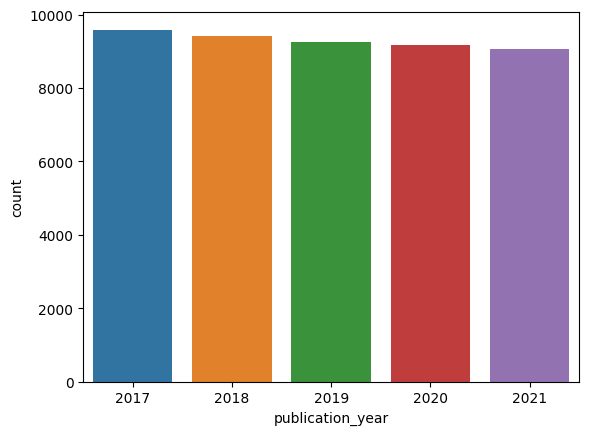

In [19]:
sns.countplot(data = df1_clean, x="publication_year")

In [20]:
categories=[]
for item in df1_clean['concepts_level_0'].values:
    categories.extend(item)
unique=list(set(categories))
len(unique)

19

In [21]:
unique

['Political science',
 'Computer science',
 'Geology',
 'Biology',
 'Philosophy',
 'Business',
 'Economics',
 'Medicine',
 'Geography',
 'History',
 'Engineering',
 'Mathematics',
 'Chemistry',
 'Materials science',
 'Art',
 'Physics',
 'Environmental science',
 'Sociology',
 'Psychology']

In [22]:
s = df1_clean['concepts_level_0']

In [23]:
dummies = pd.get_dummies(s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)

/var/folders/8t/pdc266556nvbq2phrrf21cd00000gn/T/ipykernel_74710/2091366517.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummies = pd.get_dummies(s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)
/var/folders/8t/pdc266556nvbq2phrrf21cd00000gn/T/ipykernel_74710/2091366517.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies = pd.get_dummies(s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)


In [24]:
final = pd.concat([df1_clean, dummies], axis=1).drop(columns=['concepts', 'concepts_level_0'])

In [25]:
final.head()

,id,title,publication_year,publication_date,month_year,Art,Biology,Business,Chemistry,Computer science,...,Geology,History,Materials science,Mathematics,Medicine,Philosophy,Physics,Political science,Psychology,Sociology
0,https://openalex.org/W2511949746,EAU-ESTRO-SIOG Guidelines on Prostate Cancer. ...,2017,2017-04-01,2017-04,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,https://openalex.org/W2805354595,Atezolizumab for First-Line Treatment of Metas...,2018,2018-06-04,2018-06,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,https://openalex.org/W4205946977,Neoliberalizing Space,2020,2020-06-22,2020-06,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,https://openalex.org/W2796277309,Review on nanoparticles and nanostructured mat...,2018,2018-04-03,2018-04,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,https://openalex.org/W2969802526,A global view of hepatocellular carcinoma: tre...,2019,2019-08-22,2019-08,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
grouped = final.groupby(['publication_year'])

In [27]:
grouped_months = final.groupby(['month_year'])

In [28]:
grouped_months

In [35]:
new_df=pd.DataFrame()
for value in unique:
    new_df[value]=grouped[value].sum()

In [47]:
df_months=pd.DataFrame()
for value in unique:
    df_months[value]=grouped_months[value].sum()

In [50]:
df_months = df_months.apply(pd.to_numeric).reset_index()
df_months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   month_year             60 non-null     period[M]
 1   Political science      60 non-null     uint8    
 2   Computer science       60 non-null     uint64   
 3   Geology                60 non-null     uint8    
 4   Biology                60 non-null     uint64   
 5   Philosophy             60 non-null     uint8    
 6   Business               60 non-null     uint8    
 7   Economics              60 non-null     uint8    
 8   Medicine               60 non-null     uint64   
 9   Geography              60 non-null     uint8    
 10  History                60 non-null     uint8    
 11  Engineering            60 non-null     uint64   
 12  Mathematics            60 non-null     uint8    
 13  Chemistry              60 non-null     uint64   
 14  Materials science      60 no

In [39]:
new_df.reset_index(inplace=True)

In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   publication_year       5 non-null      int64 
 1   Political science      5 non-null      uint64
 2   Computer science       5 non-null      uint64
 3   Geology                5 non-null      uint64
 4   Biology                5 non-null      uint64
 5   Philosophy             5 non-null      uint64
 6   Business               5 non-null      uint64
 7   Economics              5 non-null      uint64
 8   Medicine               5 non-null      uint64
 9   Geography              5 non-null      uint64
 10  History                5 non-null      uint8 
 11  Engineering            5 non-null      uint64
 12  Mathematics            5 non-null      uint64
 13  Chemistry              5 non-null      uint64
 14  Materials science      5 non-null      uint64
 15  Art                    5 no

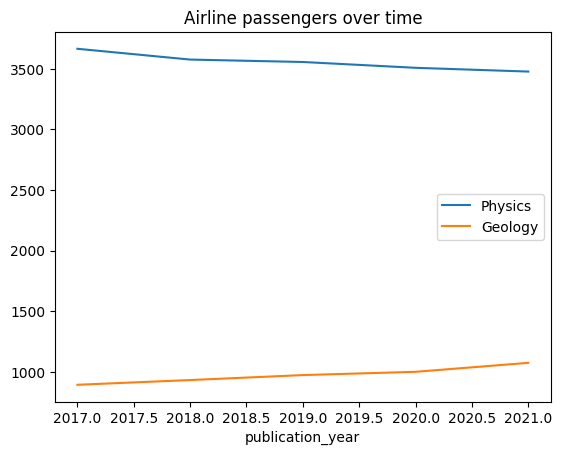

In [54]:
new_df.plot(x='publication_year', 
             y=['Physics', 'Geology'], 
             title='Airline passengers over time');

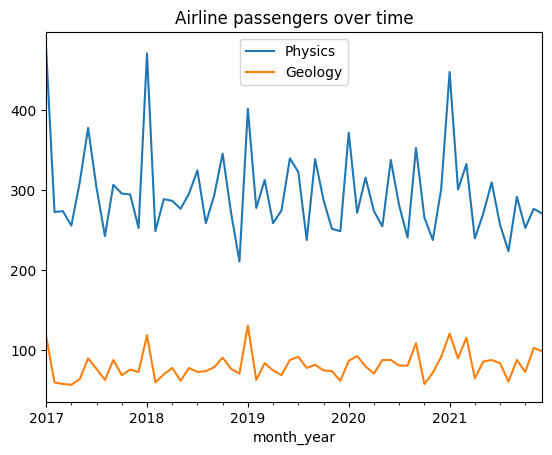

In [53]:
df_months.plot(x='month_year', 
             y=['Physics', 'Geology'], 
             title='Airline passengers over time');

In [38]:
sns.countplot(data = new_df['Geology'])

KeyError: 0

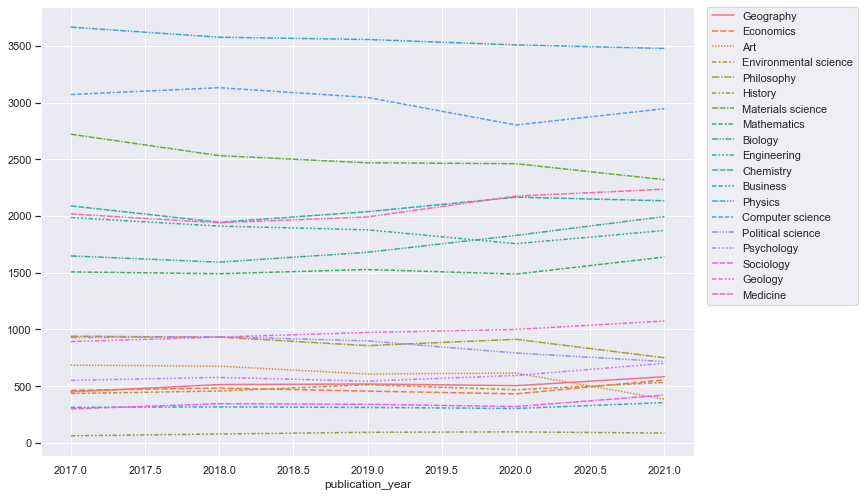

In [153]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
g = sns.lineplot(data=new_df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# g.set_xticks([1,2,3,4,5]) # <--- set the ticks first
# g.set_xticklabels([2017,2018,2019,2020,2021])
# plt.xticks(range(len(new_df)),['2017','2018','2019','2020','2021'])
# sns.set(rc={"xtick.bottom" : False, "ytick.left" : True})


TypeError: Invalid object type at position 0

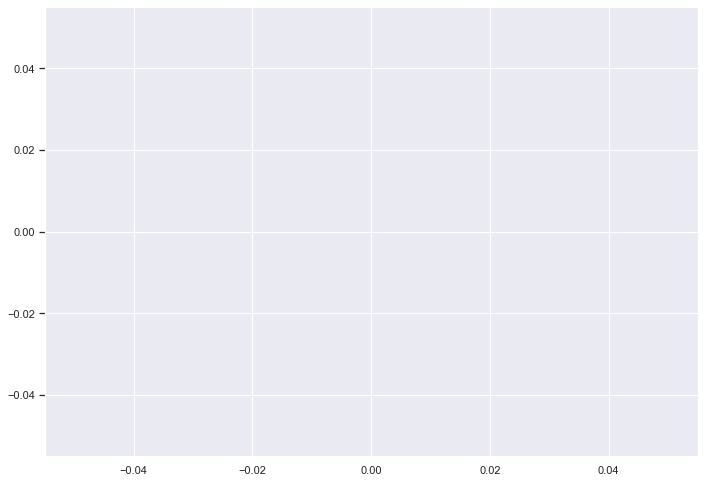

In [157]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
g = sns.lineplot(data=df_months)
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# g.set_xticks([1,2,3,4,5]) # <--- set the ticks first
# g.set_xticklabels([2017,2018,2019,2020,2021])
# plt.xticks(range(len(new_df)),['2017','2018','2019','2020','2021'])
# sns.set(rc={"xtick.bottom" : False, "ytick.left" : True})


In [37]:
social=['Economics', 'Sociology', 'Political science', 'Business', 'Geography']
earth_science=['Medicine','Biology', 'Environmental science', 'Geology', 'Psychology', 'Materials science']
engineering_maths=['Engineering', 'Computer science', 'Chemistry', 'Physics', 'Mathematics']
humanities=['Philosophy', 'History', 'Art']

In [38]:
new_df_social=new_df[social]
new_df_earth=new_df[earth_science]
new_df_engineering=new_df[engineering_maths]
new_df_humanities=new_df[humanities]

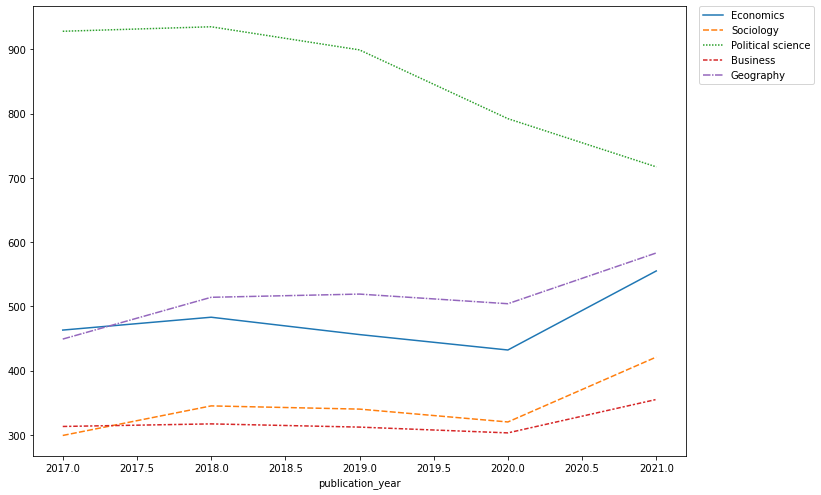

In [39]:

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.lineplot(data=new_df_social)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


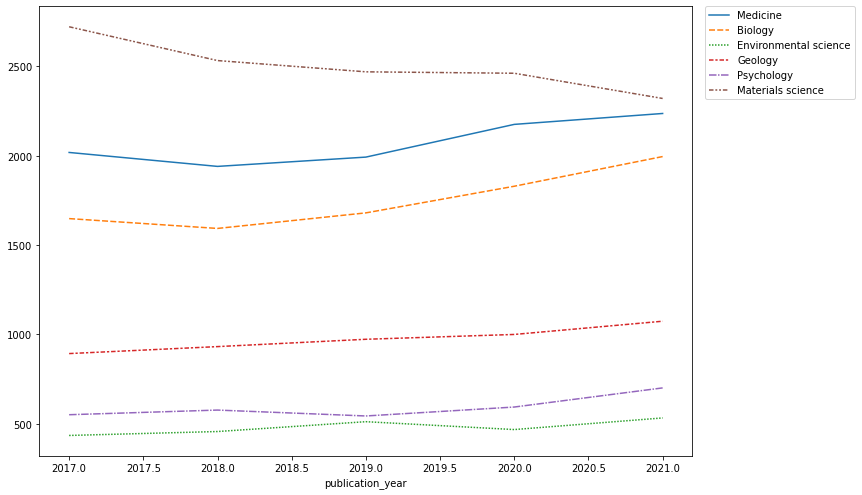

In [40]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.lineplot(data=new_df_earth)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

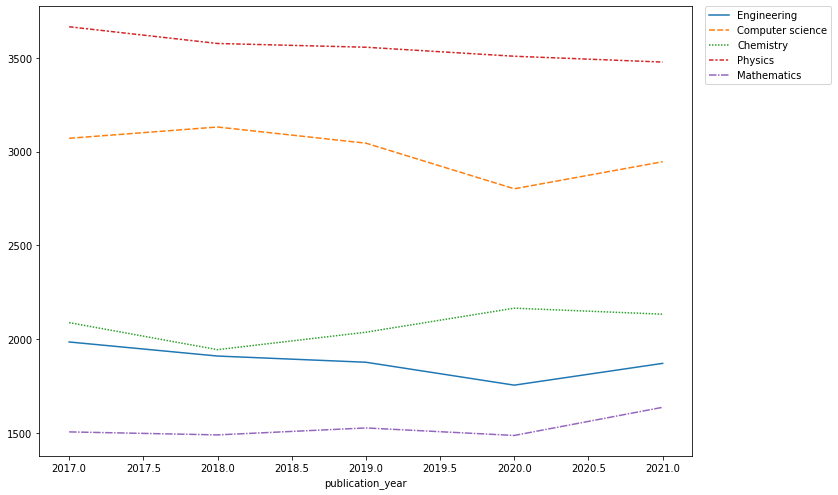

In [41]:

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.lineplot(data=new_df_engineering)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


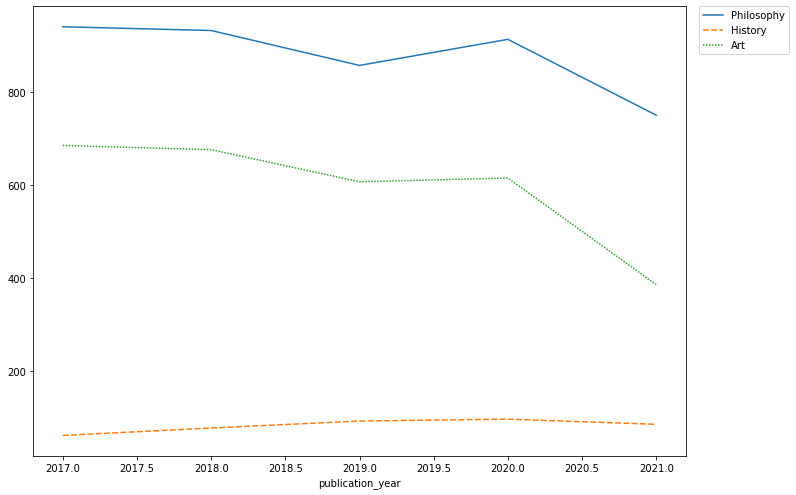

In [42]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.lineplot(data=new_df_humanities)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Exercise 2

1. Get all the publications that have at least 2 authors in them
2.  Notions of centrality: 
 -  Connectedness 1: How many publications with grenoble authors they have
 - Connectedness 2: With how many different grenoble authors they have published
 -  A factor of the two
 -  A factor of the first two with the average impact factor of their publications with Grenoble authors
 -  A recursive notion: number of connections with connected authors
3. Download the grenoble authors and check their cited scores. See if there is a correlation with connectedness
 

In [24]:
df2=df[['id', 'authorships',]]

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49579 entries, 0 to 49578
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           49579 non-null  object
 1   authorships  49579 non-null  object
dtypes: object(2)
memory usage: 774.8+ KB


## Connectedness 1

In [26]:
def num_grenoble_authors(row):
    return len([author for author in row['authorships'] if (author['raw_affiliation_string'] is not None) and ("grenoble" in author['raw_affiliation_string'].lower())])

In [27]:
df2['num_grenoble_authors'] = df2.apply(num_grenoble_authors, axis=1)

/var/folders/kb/lywh42216h13zy46p5f_0fg40000gn/T/ipykernel_3648/4223153541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['num_grenoble_authors'] = df2.apply(num_grenoble_authors, axis=1)


In [28]:
df2['is_connected'] = df2.apply(lambda row: 1 if num_grenoble_authors(row)>1 else 0, axis=1)

/var/folders/kb/lywh42216h13zy46p5f_0fg40000gn/T/ipykernel_3648/626185418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['is_connected'] = df2.apply(lambda row: 1 if num_grenoble_authors(row)>1 else 0, axis=1)


In [29]:
def extract_author_ids(row):
    authors = [author['author']['id'] for author in row['authorships']]
    return authors

df2['authors'] = df2.apply(lambda row: extract_author_ids(row), axis=1) 

/var/folders/kb/lywh42216h13zy46p5f_0fg40000gn/T/ipykernel_3648/316629148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['authors'] = df2.apply(lambda row: extract_author_ids(row), axis=1)


In [30]:
flat_list = [item for items in df2.authorships.values for item in items if (item['raw_affiliation_string'] is not None) and ('grenoble' in item['raw_affiliation_string'].lower())]


In [57]:
authors_sim = [{'author_id': item['author']['id'],
  'name':item['author']['display_name']}
 for item in flat_list]

In [72]:
grenoble_authors = pd.DataFrame.from_dict(authors_sim)

In [73]:
grenoble_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115592 entries, 0 to 115591
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   author_id  115592 non-null  object
 1   name       115592 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [74]:
grenoble_authors = grenoble_authors.drop_duplicates(ignore_index=True)

In [75]:
grenoble_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36958 entries, 0 to 36957
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  36958 non-null  object
 1   name       36958 non-null  object
dtypes: object(2)
memory usage: 577.6+ KB


In [76]:
work_author_pairs = df2[df2['is_connected']==1][['id', 'authors']]

In [77]:
work_author_pairs = work_author_pairs.explode('authors')

In [78]:
grenoble_work_author_pairs = work_author_pairs[work_author_pairs['authors'].isin(grenoble_authors['author_id'])]

In [79]:
count_works = grenoble_work_author_pairs.groupby('authors').count().reset_index()
count_works

,authors,id
0,https://openalex.org/A1002805135,2
1,https://openalex.org/A1007915466,6
2,https://openalex.org/A100908830,1
3,https://openalex.org/A1009761877,4
4,https://openalex.org/A1015310080,1
...,...,...
28519,https://openalex.org/A974871389,17
28520,https://openalex.org/A975039927,1
28521,https://openalex.org/A97906723,6
28522,https://openalex.org/A985776687,4


In [66]:
def get_connectedness1(row):
    author_id = row['author_id']
    if not count_works['id'][count_works['authors']==author_id].empty:
        count = count_works['id'][count_works['authors']==author_id].values[0]
        return count
    else:
        return 0

In [80]:
grenoble_authors['connectedness_1']=grenoble_authors.apply(get_connectedness1, axis=1)

In [81]:
grenoble_authors[grenoble_authors.name=="Jean-Louis Pépin"]

,author_id,name,connectedness_1
8,https://openalex.org/A2596381244,Jean-Louis Pépin,206
13161,https://openalex.org/A4227283002,Jean-Louis Pépin,1
19358,https://openalex.org/A4202217154,Jean-Louis Pépin,1
32826,https://openalex.org/A4260292885,Jean-Louis Pépin,1
35347,https://openalex.org/A4261509675,Jean-Louis Pépin,1


## Connectedness 2

In [82]:
def get_connectedness2(row):
    author_id = row['author_id']
    works = grenoble_work_author_pairs['id'][grenoble_work_author_pairs['authors']==author_id]
    num_colabs = len(np.unique((grenoble_work_author_pairs['authors'][(grenoble_work_author_pairs['authors']!=author_id) & grenoble_work_author_pairs['id'].isin(list(works))]).values))
    return num_colabs

In [83]:
grenoble_authors['connectedness_2']=grenoble_authors.apply(get_connectedness2, axis=1)
#takes 30 minutes. save in csv at this point

In [84]:
grenoble_authors.to_csv('data/grenoble_authors.csv', index=False)

In [145]:
grenoble_authors = pd.read_csv('data/grenoble_authors.csv')  

In [146]:
grenoble_authors

,author_id,name,connectedness_1,connectedness_2
0,https://openalex.org/A2081927895,Michel Bolla,1,8
1,https://openalex.org/A2967507403,Christian A. Thomas,0,0
2,https://openalex.org/A4208415029,Frédéric Bally,0,0
3,https://openalex.org/A2050409607,Alain Dufresne,38,36
4,https://openalex.org/A2061986354,Pierre Hainaut,23,103
...,...,...,...,...
36953,https://openalex.org/A4207761270,Isabelle Lordey,1,6
36954,https://openalex.org/A4208119760,Rolando Rebois,1,4
36955,https://openalex.org/A4225885156,"Meulemans, Germain",0,0
36956,https://openalex.org/A4227555375,Yassine Laguel,0,0


## Connectedness 3

In [147]:
grenoble_authors['connectedness_3'] = grenoble_authors['connectedness_1'] * grenoble_authors['connectedness_2']

In [148]:
grenoble_authors

,author_id,name,connectedness_1,connectedness_2,connectedness_3
0,https://openalex.org/A2081927895,Michel Bolla,1,8,8
1,https://openalex.org/A2967507403,Christian A. Thomas,0,0,0
2,https://openalex.org/A4208415029,Frédéric Bally,0,0,0
3,https://openalex.org/A2050409607,Alain Dufresne,38,36,1368
4,https://openalex.org/A2061986354,Pierre Hainaut,23,103,2369
...,...,...,...,...,...
36953,https://openalex.org/A4207761270,Isabelle Lordey,1,6,6
36954,https://openalex.org/A4208119760,Rolando Rebois,1,4,4
36955,https://openalex.org/A4225885156,"Meulemans, Germain",0,0,0
36956,https://openalex.org/A4227555375,Yassine Laguel,0,0,0


In [38]:
grenoble_authors.nlargest(10, 'connectedness_3')

,author_id,name,connectedness_1,connectedness_2,connectedness_3
8,https://openalex.org/A2596381244,Jean-Louis Pépin,206,220,45320
2037,https://openalex.org/A2196954048,Gerard Ghibaudo,148,249,36852
173,https://openalex.org/A2420782966,Renaud Tamisier,180,179,32220
1397,https://openalex.org/A1975902673,Jean-François Timsit,130,207,26910
613,https://openalex.org/A2308027254,J.M. Hartmann,101,248,25048
205,https://openalex.org/A1955230402,Yohann Couté,97,244,23668
1430,https://openalex.org/A2974844775,Maud Vinet,88,231,20328
1851,https://openalex.org/A2171459722,Laurence Bouillet,94,203,19082
1429,https://openalex.org/A1916288200,Sylvain Barraud,92,177,16284
1175,https://openalex.org/A2577985073,Jean-Luc Bosson,60,255,15300


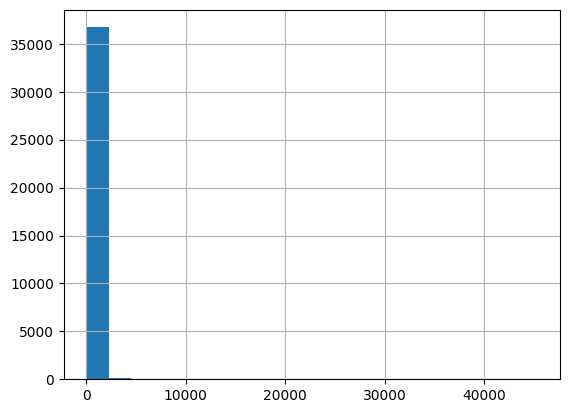

In [153]:
hist = grenoble_authors['connectedness_3'].hist(bins=20)

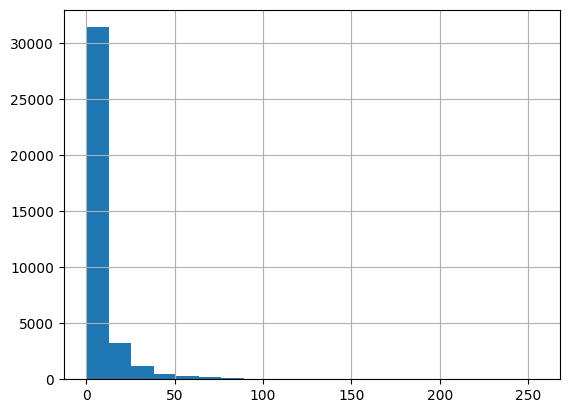

In [242]:
hist = grenoble_authors['connectedness_2'].hist(bins=20)

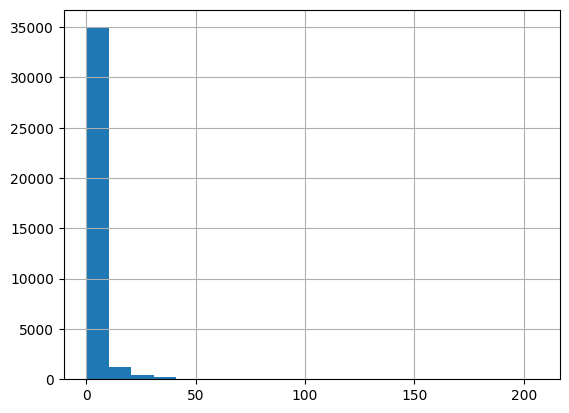

In [243]:
hist = grenoble_authors['connectedness_1'].hist(bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa21a8f4d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa21a8f52a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa21a8f4ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa21a8f57e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa21a8f5a80>],
 'means': []}

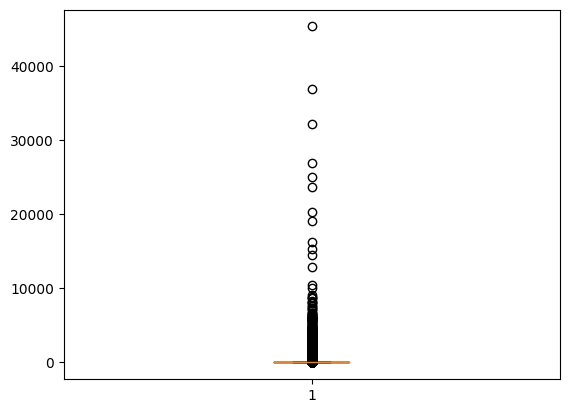

In [155]:
plt.boxplot(grenoble_authors['connectedness_3'])

In [244]:
#mirar la correlació amb concepts i amb institutions

# Exercise 3

In [475]:
df3 = df[['id', 'title', 'abstract_inverted_index']]

In [476]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49579 entries, 0 to 49578
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       49579 non-null  object
 1   title                    49572 non-null  object
 2   abstract_inverted_index  40226 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [477]:
df3 = df3.dropna().reset_index().drop(columns='index')

In [478]:
df3 = df3[df3['abstract_inverted_index']!={}].reset_index().drop(columns='index')
#some indexs are empty dictionaries

In [479]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40211 entries, 0 to 40210
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       40211 non-null  object
 1   title                    40211 non-null  object
 2   abstract_inverted_index  40211 non-null  object
dtypes: object(3)
memory usage: 942.6+ KB


In [480]:
df3 = df3.drop_duplicates(subset=['title'], ignore_index=True)

In [481]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39409 entries, 0 to 39408
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       39409 non-null  object
 1   title                    39409 non-null  object
 2   abstract_inverted_index  39409 non-null  object
dtypes: object(3)
memory usage: 923.8+ KB


## Compose index

In [482]:
def compose_abstract(row):
    inverted_index=row['abstract_inverted_index']
    
    num_to_word={}
    for key, values in inverted_index.items():
        for value in values:
            num_to_word[value]=key

    abstract=[]
    k=0
    while k <= max(num_to_word.keys()):
        if k in num_to_word: 
            abstract.append(num_to_word[k])
        k+=1

    return ' '.join(abstract)


In [483]:
df3['abstract']=df3.apply(compose_abstract, axis=1)

KeyboardInterrupt: 

In [ ]:
def detect_lang(x):
    try:
        return str(detect(x))
    except:
        return 'No language detected.'
        print(x)

In [ ]:
df3['lang']=df3.abstract.apply(detect_lang)

In [205]:
df3.to_csv('data/abstracts_langs.csv', index=False)

In [157]:
df3 = pd.read_csv('data/abstracts_langs.csv')  

In [158]:
df3.lang.value_counts()

en                       34619
fr                        4613
es                          79
it                          23
pt                          23
de                          14
ca                          13
nl                           8
ru                           6
ro                           3
pl                           3
sv                           1
cs                           1
No language detected.        1
cy                           1
tl                           1
Name: lang, dtype: int64

<AxesSubplot: >

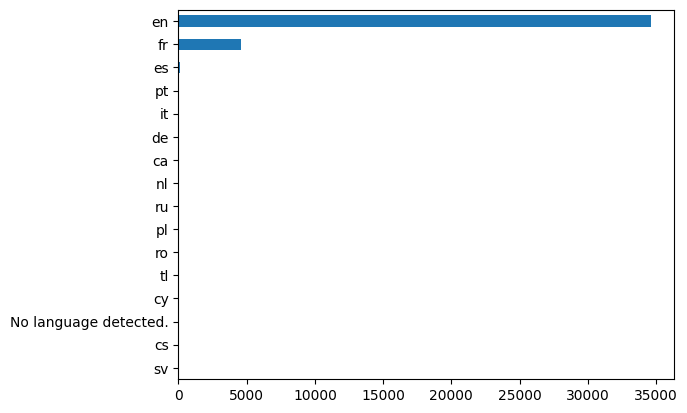

In [159]:
df3.lang.value_counts().sort_values().plot(kind = 'barh')


In [161]:
df3_eng = df3[df3.lang=='en']
#for this exercise, I focus on the english abstracts. In reality, I would have translated the abstracts.

In [162]:
df3_eng = df3_eng.reset_index().drop(columns='index')

## Extract keywords

In [294]:
#for keyword extraction:
#ttps://www.analyticsvidhya.com/blog/2022/01/four-of-the-easiest-and-most-effective-methods-of-keyword-extraction-from-a-single-text-using-python/

In [173]:
def clean_text(text_data):
    
    tokens = tokenizer.tokenize(text_data)
    
    lowercased = [w.lower() for w in tokens]
    
    no_sw = [w for w in lowercased if (not w in stop_words_en and not w in stop_words_fr)]
    
    lemmas = [lemmatizer.lemmatize(word) for word in no_sw]
    
    no_punct = [w for w in lemmas if w.isalpha()]#if more time, avoid deleting dashes
    
    final = [w for w in no_punct if len(w)>2]
    
    return ' '.join(final)

In [174]:
df3_eng['clean_abstract']=df3_eng['abstract'].apply(clean_text)

In [210]:
df3_eng['clean_title']=df3_eng['title'].apply(clean_text)

/var/folders/8t/pdc266556nvbq2phrrf21cd00000gn/T/ipykernel_64503/3166732752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['clean_title']=df3['title'].apply(clean_text)


In [211]:
df3_eng.head()

,id,title,abstract_inverted_index,abstract,lang,clean_abstract,clean_title
0,https://openalex.org/W2511949746,"EAU-ESTRO-SIOG Guidelines on Prostate Cancer. Part 1: Screening, Diagnosis, and Local Treatment with Curative Intent","{'To': [0], 'present': [1, 392], 'a': [2, 49, 74, 124, 148, 204, 253, 462], 'summary': [3], 'of': [4, 8, 12, 26, 40, 52, 64, 68, 77, 103, 147, 153, 169, 223, 231, 243, 314, 319, 363, 371, 400, 412, 483], 'the': [5, 9, 53, 62, 78, 95, 98, 131, 145, 154, 167, 173, 181, 199, 229, 241, 261, 293, 312, 332, 339, 346, 352, 360, 368, 380, 396, 410, 420], '2016': [6, 326, 386], 'version': [7, 376], 'European': [10, 16, 353], 'Association': [11], 'Urology': [13], '(EAU)': [14], '-': [15, 23], 'Society': [17, 25, 102, 354, 362], 'for': [18, 87, 338, 355, 456], 'Radiotherapy': [19, 356], '&': [20], 'Oncology': [21, 28, 358, 365], '(ESTRO)': [22], 'International': [24, 101, 361], 'Geriatric': [27, 364], '(SIOG)': [29], 'Guidelines': [30, 328, 391], 'on': [31, 73, 264, 329, 395, 419], 'screening,': [32, 431], 'diagnosis,': [33, 315, 397], 'and': [34, 61, 89, 127, 134, 161, 177, 228, 278, 302, 317, 336, 357, 359, 366, 383, 398, 407, 471], 'local': [35, 208], 'treatment': [36, 178, 255, 318, 399], 'with': [37, 217, 257, 271, 415, 464], 'curative': [38], 'intent': [39], 'clinically': [41, 401], 'localised': [42, 320, 402], 'prostate': [43, 403], 'cancer': [44], '(PCa).The': [45], 'working': [46], 'panel': [47], 'performed': [48], 'literature': [50], 'review': [51, 76], 'new': [54], 'data': [55, 282], '(2013-2015).': [56], 'The': [57, 221, 325], 'guidelines': [58, 349], 'were': [59, 70], 'updated': [60, 393], 'levels': [63], 'evidence': [65], 'and/or': [66], 'grades': [67], 'recommendation': [69], 'added': [71, 83], 'based': [72, 263], 'systematic': [75, 193], 'evidence.BRCA2': [79], 'mutations': [80], 'have': [81, 235], 'been': [82, 236, 418], 'as': [84, 238, 240, 267, 269, 481], 'risk': [85, 149], 'factors': [86, 434], 'early': [88, 141], 'aggressive': [90], 'disease.': [91], 'In': [92, 405], 'addition': [93], 'to': [94, 165, 214, 291, 426, 445], 'Gleason': [96], 'score,': [97], 'five-tier': [99], '2014': [100], 'Urological': [104], 'Pathology': [105], 'grading': [106], 'system': [107], 'should': [108, 458], 'now': [109], 'be': [110, 138, 163, 215, 424, 437, 459, 479], 'provided.': [111], 'Systematic': [112], 'screening': [113, 457], 'is': [114, 252, 276, 322, 377], 'still': [115, 284, 305], 'not': [116], 'recommended.': [117], 'Instead,': [118], 'an': [119, 288, 427, 475, 484], 'individual': [120], 'risk-adapted': [121, 486], 'strategy': [122], 'following': [123], 'detailed': [125], 'discussion': [126, 463], 'taking': [128], 'into': [129], 'account': [130], 'patient's': [132], ...}","To present a summary of the 2016 version of the European Association of Urology (EAU) - European Society for Radiotherapy & Oncology (ESTRO) - International Society of Geriatric Oncology (SIOG) Guidelines on screening, diagnosis, and local treatment with curative intent of clinically localised prostate cancer (PCa).The working panel performed a literature review of the new data (2013-2015). The guidelines were updated and the levels of evidence and/or grades of recommendation were added based on a systematic review of the evidence.BRCA2 mutations have been added as risk factors for early and aggressive disease. In addition to the Gleason score, the five-tier 2014 International Society of Urological Pathology grading system should now be provided. Systematic screening is still not recommended. Instead, an individual risk-adapted strategy following a detailed discussion and taking into account the patient's wishes and life expectancy must be considered. An early prostate-specific antigen test, the use of a risk calculator, or one of the promising biomarker tools are being investigated and might be able to limit the overdetection of insignificant PCa. Breaking the link between diagnosis and treatment may lower the overtreatment risk. Multi

In [215]:
def extract_keywords(row):
    kwds_abs = keywords.keywords(row['clean_abstract'], scores=False).split()[0:10]
    kwds_title = keywords.keywords(row['clean_title'], scores=False).split()[0:10]
    return list(set(kwds_abs+kwds_title))

In [177]:
import yake 

def extract_keywords_YAKE(row):
    language = "en"
    max_ngram_size = 3
    deduplication_thresold = 0.9
    deduplication_algo = 'seqm'
    windowSize = 1
    numOfKeywords = 5

    kw_extractor = yake.KeywordExtractor(lan=language, 
                                     n=max_ngram_size, 
                                     dedupLim=deduplication_thresold, 
                                     dedupFunc=deduplication_algo, 
                                     windowsSize=windowSize, 
                                     top=numOfKeywords)
                                            
    keywords = kw_extractor.extract_keywords(row['clean_abstract'])

    return keywords

In [178]:
df3_test=df3_eng.copy()

In [179]:
df3_test['keywords'] = df3_test.apply(extract_keywords_YAKE, axis=1)

In [181]:
df3_test.keywords

0        [(international society geriatric, 0.000276412...
1        [(month month hazard, 0.00015506162491175883),...
2        [(nanomaterials gained prominence, 0.001175041...
3        [(surveillance early detection, 0.000871608532...
4        [(delirium immobility sleep, 0.000107056836380...
                               ...                        
34614    [(elevates foot acceleration, 0.00022072257208...
34615    [(tyrell rockafellar collaborator, 0.003868729...
34616    [(extensively study investigated, 0.0020771424...
34617    [(individual component petrographic, 0.0008779...
34618    [(plasmacytoid dendritic cell, 0.0008205972449...
Name: keywords, Length: 34619, dtype: object

In [182]:
df3_test.to_csv('data/extracted_keywords_ngrams.csv', index=False)

In [216]:
df3_eng['keywords'] = df3_eng.apply(extract_keywords, axis=1)

In [217]:
df3_eng.to_csv('data/extracted_keywords.csv', index=False)

In [218]:
df3_eng = pd.read_csv('data/extracted_keywords.csv')  

In [220]:
df3_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34619 entries, 0 to 34618
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       34619 non-null  object
 1   title                    34619 non-null  object
 2   abstract_inverted_index  34619 non-null  object
 3   abstract                 34619 non-null  object
 4   lang                     34619 non-null  object
 5   clean_abstract           34619 non-null  object
 6   clean_title              34598 non-null  object
 7   keywords                 34619 non-null  object
dtypes: object(8)
memory usage: 2.1+ MB


In [221]:
flat_kwds = [item for items in [ast.literal_eval(item) for item in df3_eng.keywords.values] for item in items]


In [222]:
common_academic_ws = 'ability, absence, account, achievement, act, action, activity, addition, adoption, adult, advance, advantage, advice, age, aim, alternative, amount, analogy, analysis, application, approach, argument, aspect, assertion, assessment, assistance, association, assumption, attempt, attention, attitude, author, awareness, balance, basis, behaviour, being, belief, benefit, bias, birth, capacity, case, category, cause, centre, challenge, change, character, characteristic, choice, circumstance, class, classification, code, colleague, combination, commitment, committee, communication, community, comparison, complexity, compromise, concentration, concept, conception, concern, conclusion, condition, conduct, conflict, consensus, consequence, consideration, constraint, construction, content, contradiction, contrast, contribution, control, convention, correlation, country, creation, crisis, criterion, criticism, culture, damage, data, debate, decision, decline, defence, definition, degree, demand, description, destruction, determination, development, difference, difficulty, dilemma, dimension, disadvantage, discovery, discrimination, discussion, distinction, diversity, division, doctrine, effect, effectiveness, element, emphasis, environment, error, essence, establishment, evaluation, event, evidence, evolution, examination, example, exception, exclusion, existence, expansion, experience, experiment, explanation, exposure, extent, extreme, fact, factor, failure, feature, female, figure, finding, force, form, formation, function, future, gain, group, growth, guidance, guideline, hypothesis, idea, identity, impact, implication, importance, improvement, increase, indication, individual, influence, information, insight, instance, institution, integration, interaction, interest, interpretation, intervention, introduction, investigation, isolation, issue, kind, knowledge, lack, learning, level, likelihood, limit, limitation, link, list, literature, logic, loss, maintenance, majority, male, manipulation, mankind, material, means, measure, medium, member, method, minority, mode, model, motivation, movement, need, network, norm, notion, number, observation, observer, occurrence, operation, opportunity, option, organisation, outcome, output, parallel, parent, part, participant, past, pattern, percentage, perception, period, person, personality, perspective, phenomenon, point, policy, population, position, possibility, potential, practice, presence, pressure, problem, procedure, process, production, programme, progress, property, proportion, proposition, protection, provision, publication, purpose, quality, question, range, rate, reader, reality, reason, reasoning, recognition, reduction, reference, relation, relationship, relevance, report, representative, reproduction, requirement, research, resistance, resolution, resource, respect, restriction, result, review, rise, risk, role, rule, sample, scale, scheme, scope, search, section, selection, sense, separation, series, service, set, sex, shift, significance, similarity, situation, skill, society, solution, source, space, spread, standard, statistics, stimulus, strategy, stress, structure, subject, success, summary, support, survey, system, target, task, team, technique, tendency, tension, term, theme, theory, tolerance, topic, tradition, transition, trend, type, uncertainty, understanding, unit, use, validity, value, variation, variety, version, view, viewpoint, volume, whole, work, world, accept, account (for), achieve, acquire, act, adapt, adopt, advance, advocate, affect, aid, aim, allocate, allow, alter, analyse, appear, apply, argue, arise, assert, assess, assign, associate, assist, assume, attain, attempt, attend, attribute, avoid, base, be, become, benefit, can, cause, characterise, choose, cite, claim, clarify, classify, coincide, combine, compare, compete, comprise, concentrate, concern, conclude, conduct, confine, conform, connect, consider, consist, constitute, construct, contain, contrast, contribute, control, convert, correspond, create, damage, deal, decline, define, demonstrate, depend, derive, describe, design, destroy, determine, develop, differ, differentiate, diminish, direct, discuss, display, distinguish, divide, dominate, effect, eliminate, emerge, emphasize, employ, enable, encounter, encourage, enhance, ensure, establish, evaluate, evolve, examine, exceed, exclude, exemplify, exist, expand, experience, explain, expose, express, extend, facilitate, fail, favour, finance, focus, follow, form, formulate, function, gain, generate, govern, highlight, identify, illustrate, imply, impose, improve, include, incorporate, increase, indicate, induce, influence, initiate, integrate, interpret, introduce, investigate, involve, isolate, label, lack, lead, limit, link, locate, maintain, may, measure, neglect, note, obtain, occur, operate, outline, overcome, participate, perceive, perform, permit, pose, possess, precede, predict, present, preserve, prevent, produce, promote, propose, prove, provide, publish, pursue, quote, receive, record, reduce, refer, reflect, regard, regulate, reinforce, reject, relate, rely, remain, remove, render, replace, report, represent, reproduce, require, resolve, respond, restrict, result, retain, reveal, seek, select, separate, should, show, solve, specify, state, stimulate, strengthen, stress, study, submit, suffer, suggest, summarise, supply, support, sustain, tackle, tend, term, transform, treat, undermine, undertake, use, vary, view, write, yield, absolute, abstract, acceptable, accessible, active, actual, acute, additional, adequate, alternative, apparent, applicable, appropriate, arbitrary, available, average, basic, central, certain, clear, common, competitive, complete, complex, comprehensive, considerable, consistent, conventional, correct, critical, crucial, dependent, detailed, different, difficult, distinct, dominant, early, effective, equal, equivalent, essential, evident, excessive, experimental, explicit, extensive, extreme, far, favourable, final, fixed, following, formal, frequent, fundamental, future, general, great, high, human, ideal, identical, immediate, important, inadequate, incomplete, independent, indirect, individual, inferior, influential, inherent, initial, interesting, internal, large, late, leading, likely, limited, local, logical, main, major, male, maximum, mental, minimal, minor, misleading, modern, mutual, natural, necessary, negative, new, normal, obvious, original, other, overall, parallel, partial, particular, passive, past, permanent, physical, positive, possible, potential, practical, present, previous, primary, prime, principal, productive, profound, progressive, prominent, psychological, radical, random, rapid, rational, real, realistic, recent, related, relative, relevant, representative, responsible, restricted, scientific, secondary, selective, separate, severe, sexual, significant, similar, simple, single, so-called, social, special, specific, stable, standard, strict, subsequent, substantial, successful, successive, sufficient, suitable, surprising, symbolic, systematic, theoretical, total, traditional, true, typical, unique, unlike, unlikely, unsuccessful, useful, valid, valuable, varied, various, visual, vital, wide, widespread, above, accordingly, accurately, adequately, also, approximately, at best, basically, clearly, closely, commonly, consequently, considerably, conversely, correctly, directly, effectively, e.g., either, equally, especially, essentially, explicitly, extremely, fairly, far, for example, for instance, frequently, fully, further, generally, greatly, hence, highly, however, increasingly, indeed, independently, indirectly, inevitably, initially, in general, in particular, largely, less, mainly, more, moreover, most, namely, necessarily, normally, notably, often, only, originally, over, partially, particularly, potentially, previously, primarily, purely, readily, recently, relatively, secondly, significantly, similarly, simply, socially, solely somewhat, specifically, strongly, subsequently, successfully, thereby, therefore, thus, traditionally, typically, ultimately, virtually, wholly, widely, according to, although, an, as, as opposed to, as to, as well as, because, because of, between, both, by, contrary to, depending on, despite, due to, during, each, even though, fewer, first, former, from, for, given that, in, in addition to, in common with, in favour of, in relation to, in response to, in terms of, in that, in the light of, including, its, itself, latter, less, little, many, most, of, or, other than, per, prior to, provided, rather than, same, second, several, since, some, subject to, such, such as, than, that, the, their, themselves, these, third, this, those, to, unlike, upon, versus, whereas, whether, whether or not, which, within'
# Comes from here: https://uclouvain.be/en/research-institutes/ilc/cecl/the-academic-keyword-list-akl.html
# if more time, refine this list

In [223]:
common_academic_ws = common_academic_ws.split(", ")

In [224]:
clean_kwds = [word for word in flat_kwds if word not in common_academic_ws]

In [231]:
from collections import Counter
 
def top_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(10)
   


In [ ]:
print(top_frequent(clean_kwds))

In [226]:
common_academic_ws.extend(['proposed', 'based', 'observed', 'associated', 'paper', 'studied', 'compared', 'provides'])

In [227]:
clean_kwds = [word for word in flat_kwds if word not in common_academic_ws]
print(top_frequent(clean_kwds))

[('patient', 2093), ('magnetic', 1377), ('cell', 1092), ('temperature', 1065), ('structural', 1016), ('measurement', 984), ('phase', 966), ('energy', 930), ('performance', 883), ('surface', 796)]


In [ ]:
#if more time: ngrams, translate french into English for normalization, refine list, other algorithms for keyword extraction


# Exercise 4

In [228]:
df4 = final[final["Medicine"]==1].reset_index().drop(columns='index')

In [229]:
df4 = df4[['id']]

In [230]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10361 entries, 0 to 10360
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10361 non-null  object
dtypes: object(1)
memory usage: 81.1+ KB


In [231]:
other = df3[['id', 'abstract']]
other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34619 entries, 0 to 34618
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        34619 non-null  object
 1   abstract  34619 non-null  object
dtypes: object(2)
memory usage: 541.0+ KB


In [232]:
joint = df4.join(other.set_index('id'), on='id', how='inner')
#the dataframe is smaller than all those that belonged to the concept Medicine, because there were some empty abstracts

In [233]:
joint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7170 entries, 0 to 10360
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7170 non-null   object
 1   abstract  7170 non-null   object
dtypes: object(2)
memory usage: 168.0+ KB


In [73]:
nlp = spacy.load("en_ner_bc5cdr_md")

In [234]:
def get_diseases(text):
    doc = nlp(text)
    pred = doc.ents
    diseases = [word.text for word in pred if word.label_=='DISEASE']
    return diseases

In [236]:
joint['diseases'] = joint['abstract'].apply(get_diseases)

In [237]:
joint.to_csv('data/extracted_diseases.csv', index=False)

In [203]:
df4 = pd.read_csv('data/extracted_diseases.csv')

In [204]:
df4.diseases

0       ['prostate cancer', 'aggressive disease', 'hyp...
1       ['nonsquamous non-small-cell lung cancer', 'NS...
2       ['Hepatocellular carcinoma', 'HCC', 'cancer-re...
3       ['Pain', 'Agitation', 'Delirium', 'Pain', 'Del...
4       ['atrial fibrillation', 'atrial fibrillation',...
                              ...                        
7165    ['Abstract Pseudomonas aeruginosa', 'opportuni...
7166                                                   []
7167                                  ['death', 'deaths']
7168                                                   []
7169                                                   []
Name: diseases, Length: 7170, dtype: object

In [225]:
dis = [wd for item in df4.diseases for wd in ast.literal_eval(item)]
dis

['prostate cancer',
 'aggressive disease',
 'hypofractionation',
 'Prostate Cancer',
 'prostate cancer',
 'PCa',
 'nonsquamous non-small-cell lung cancer',
 'NSCLC',
 'tumor',
 'death',
 'death',
 'death',
 'NSCLC',
 'Hepatocellular carcinoma',
 'HCC',
 'cancer-related death',
 'HCC',
 'chronic hepatitis B',
 'alcohol addiction',
 'metabolic liver disease',
 'nonalcoholic fatty liver disease',
 'HCC',
 'HCC',
 'tumour',
 'liver dysfunction',
 'intermediate-stage cancer',
 'hepatitis',
 'HCC',
 'Pain',
 'Agitation',
 'Delirium',
 'Pain',
 'Delirium',
 'Pain',
 'Delirium',
 'Pain',
 'Delirium',
 'critically ill',
 'Pain',
 'Delirium',
 'atrial fibrillation',
 'atrial fibrillation',
 'NOACs',
 'stroke',
 'atrial fibrillation',
 'NOACs',
 'NOACs',
 'NOACs',
 'NOACs',
 'NOACs',
 'liver disease',
 'NOACs',
 'overdose',
 'bleeding',
 'bleeding',
 'bleeding',
 'AF',
 'confusion',
 'acute stroke',
 'NOACs',
 'NOACs',
 'malignancy',
 'obstructive sleep apnoea',
 'disorder',
 'neurocognitive and 

In [226]:
not_diseases=['pain', 'death', 'deaths', 'toxicity']

In [227]:
def normalize_diseases(text_data):
    
    tokens = tokenizer.tokenize(text_data)
    
    lowercased = [w.lower() for w in tokens]
    
    only_dis = [w for w in lowercased if w not in not_diseases]
        
    lemmas = [lemmatizer.lemmatize(w) for w in only_dis]
    
    return ' '.join(lemmas)

In [228]:
clean_dis = [item for item in [normalize_diseases(item) for item in dis] if item!='']
clean_dis

['prostate cancer',
 'aggressive disease',
 'hypofractionation',
 'prostate cancer',
 'prostate cancer',
 'pca',
 'nonsquamous non-small-cell lung cancer',
 'nsclc',
 'tumor',
 'nsclc',
 'hepatocellular carcinoma',
 'hcc',
 'cancer-related',
 'hcc',
 'chronic hepatitis b',
 'alcohol addiction',
 'metabolic liver disease',
 'nonalcoholic fatty liver disease',
 'hcc',
 'hcc',
 'tumour',
 'liver dysfunction',
 'intermediate-stage cancer',
 'hepatitis',
 'hcc',
 'agitation',
 'delirium',
 'delirium',
 'delirium',
 'delirium',
 'critically ill',
 'delirium',
 'atrial fibrillation',
 'atrial fibrillation',
 'noacs',
 'stroke',
 'atrial fibrillation',
 'noacs',
 'noacs',
 'noacs',
 'noacs',
 'noacs',
 'liver disease',
 'noacs',
 'overdose',
 'bleeding',
 'bleeding',
 'bleeding',
 'af',
 'confusion',
 'acute stroke',
 'noacs',
 'noacs',
 'malignancy',
 'obstructive sleep apnoea',
 'disorder',
 'neurocognitive and cardiovascular sequela',
 'obstructive sleep apnoea',
 'obstructive sleep apnoea'

In [232]:
print(top_frequent(clean_dis))

[('tumor', 1035), ('cancer', 890), ('osa', 561), ('infection', 537), ('asthma', 465), ('copd', 317), ('trauma', 285), ('stroke', 276), ('diabetes', 261), ('pd', 261)]


In [240]:
def least_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common()[-10:-1]

In [241]:
print(least_frequent(clean_dis))

[('• depression', 1), ('cerebral or pulmonary oedema', 1), ('telomeropathy', 1), ('anal sphincter injury', 1), ('idiopathic infertility', 1), ('undernutrition', 1), ('airway inflammatory disease', 1), ('cit deficiency', 1), ('sluggishness', 1)]


# Task 5 (optional)

In [274]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [323]:
df5 = df3[['id','clean_abstract']].join(final.set_index('id'), on='id', how='inner')
df5 = df5.reset_index().drop(columns='index')

In [324]:
df5 = df5.drop(columns=['publication_year', 'publication_date'])

In [325]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34566 entries, 0 to 34565
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   id                     34566 non-null  object   
 1   clean_abstract         34566 non-null  object   
 2   title                  34566 non-null  object   
 3   month_year             34566 non-null  period[M]
 4   Art                    34566 non-null  uint8    
 5   Biology                34566 non-null  uint8    
 6   Business               34566 non-null  uint8    
 7   Chemistry              34566 non-null  uint8    
 8   Computer science       34566 non-null  uint8    
 9   Economics              34566 non-null  uint8    
 10  Engineering            34566 non-null  uint8    
 11  Environmental science  34566 non-null  uint8    
 12  Geography              34566 non-null  uint8    
 13  Geology                34566 non-null  uint8    
 14  History               

In [412]:
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 2, 
                                 stop_words = 'english')
tfidf = vectorizer.fit_transform(df5["clean_abstract"])

In [296]:
vectorizer.get_feature_names_out()[:100]

array(['aaa', 'aaaa', 'aaab', 'aac', 'aacr', 'aae', 'aags', 'aaipi',
       'aaker', 'aao', 'aaos', 'aap', 'aapc', 'aar', 'aasm', 'aast',
       'aat', 'aatsr', 'aav', 'aba', 'abacus', 'abancay', 'abandon',
       'abandoned', 'abandoning', 'abandonment', 'abaqus', 'abasic',
       'abatacept', 'abatement', 'abb', 'abbie', 'abbot', 'abbott',
       'abbreviated', 'abbreviation', 'abbvie', 'abc', 'abcp', 'abd',
       'abdomen', 'abdominal', 'abdominoperineal', 'abduction',
       'abductive', 'abdullah', 'abel', 'abelian', 'aberrant',
       'aberrantly', 'aberration', 'abf', 'abg', 'abide', 'abidjan',
       'abies', 'ability', 'abiotic', 'abiotically', 'abl', 'ablated',
       'ablates', 'ablating', 'ablation', 'ablative', 'able', 'abmr',
       'abnormal', 'abnormality', 'abnormally', 'abo', 'aboard', 'aboi',
       'abolish', 'abolished', 'abolishes', 'abolishing', 'aborted',
       'abortion', 'abortive', 'aboulker', 'abound', 'aboveground',
       'abovementioned', 'abp', 'abpm',

In [413]:
len(vectorizer.get_feature_names_out())

38091

In [434]:
# Tweak the two parameters below
number_topics = 4
batch_size = 128

# Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=number_topics, 
                                learning_decay = 0.7,  # 0.7, 0.9
                                random_state = 23,
                                max_iter = 20,
                                batch_size=batch_size) 

lda.fit(tfidf)

LatentDirichletAllocation(max_iter=20, n_components=4, random_state=23)

In [305]:
# Log Likelihood: como más alta, mejor
print("Log Likelihood: ", lda.score(X_tfidf))

# Perplexity: como más baja, mejor
print("Perplexity: ", lda.perplexity(X_tfidf))

Log Likelihood:  -2064704.9980077809
Perplexity:  13757.49617616064


In [435]:
for index, topic in enumerate(lda.components_):
    print('Top 30 words for Topic {}'.format(index))
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 30 words for Topic 0
['ion', 'effect', 'layer', 'cell', 'spectroscopy', 'compound', 'interaction', 'complex', 'quantum', 'high', 'using', 'sub', 'surface', 'electron', 'structural', 'diffraction', 'field', 'film', 'scattering', 'crystal', 'neutron', 'state', 'transition', 'spin', 'material', 'property', 'phase', 'temperature', 'structure', 'magnetic']


Top 30 words for Topic 1
['propose', 'simulation', 'use', 'study', 'device', 'work', 'time', 'technology', 'energy', 'different', 'application', 'control', 'used', 'present', 'new', 'network', 'using', 'power', 'result', 'problem', 'algorithm', 'design', 'performance', 'proposed', 'based', 'data', 'approach', 'method', 'paper', 'model']


Top 30 words for Topic 2
['population', 'rate', 'level', 'effect', 'survival', 'response', 'tumor', 'analysis', 'factor', 'therapy', 'activity', 'month', 'result', 'specie', 'age', 'outcome', 'human', 'gene', 'protein', 'year', 'group', 'cancer', 'risk', 'associated', 'disease', 'clinical', 'treatm

In [436]:
doc_topic = lda.transform(tfidf)

In [437]:
tfidf.shape

(34566, 38091)

In [438]:
docs_topics={}
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    docs_topics[n]=topic_most_pr

In [439]:
df_docs_topics = pd.DataFrame.from_dict(docs_topics, orient='index')

In [440]:
df_docs_topics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34566 entries, 0 to 34565
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       34566 non-null  int64
dtypes: int64(1)
memory usage: 540.1 KB


In [441]:
df_docs_topics=df_docs_topics.rename(columns={0:'topic'})


In [453]:
df_docs_topics

,topic
0,2
1,2
2,0
3,2
4,2
...,...
34561,2
34562,1
34563,2
34564,3


In [442]:
dummies = pd.get_dummies(df_docs_topics.astype(str))

In [443]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34566 entries, 0 to 34565
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   topic_0  34566 non-null  uint8
 1   topic_1  34566 non-null  uint8
 2   topic_2  34566 non-null  uint8
 3   topic_3  34566 non-null  uint8
dtypes: uint8(4)
memory usage: 405.1 KB


In [444]:
final_df5 = df5.join(dummies, how='inner')

In [445]:
final_df5.drop(columns=['id','clean_abstract','title','month_year'])

,Art,Biology,Business,Chemistry,Computer science,Economics,Engineering,Environmental science,Geography,Geology,...,Medicine,Philosophy,Physics,Political science,Psychology,Sociology,topic_0,topic_1,topic_2,topic_3
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34561,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
34562,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34563,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34564,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [446]:
from sklearn.metrics.pairwise import pairwise_distances
#brief discussion on how to calculate correlation of binary variables: https://stackoverflow.com/questions/37003272/how-to-compute-jaccard-similarity-from-a-pandas-dataframe

In [447]:
trimmed_df=final_df5.drop(columns=['id','clean_abstract','title','month_year'])
jac_sim = 1 - pairwise_distances(trimmed_df.T, metric = "hamming")
jac_sim = pd.DataFrame(jac_sim, index=trimmed_df.columns, columns=trimmed_df.columns)

In [448]:
jac_sim

,Art,Biology,Business,Chemistry,Computer science,Economics,Engineering,Environmental science,Geography,Geology,...,Medicine,Philosophy,Physics,Political science,Psychology,Sociology,topic_0,topic_1,topic_2,topic_3
Art,1.000000,0.767430,0.950558,0.719898,0.642307,0.927761,0.756813,0.930597,0.933027,0.873836,...,0.779697,0.934878,0.547474,0.943991,0.920645,0.951108,0.729648,0.644709,0.760776,0.831366
Biology,0.767430,1.000000,0.761095,0.647023,0.537667,0.746745,0.607447,0.761789,0.762310,0.698490,...,0.683504,0.749523,0.437048,0.752734,0.733032,0.766678,0.599491,0.526066,0.764740,0.668345
Business,0.950558,0.761095,1.000000,0.703090,0.645577,0.933750,0.753370,0.914656,0.919748,0.853729,...,0.765376,0.922583,0.526905,0.943904,0.908234,0.939044,0.710004,0.665509,0.745183,0.808829
Chemistry,0.719898,0.647023,0.703090,1.000000,0.468900,0.687062,0.633628,0.701238,0.685095,0.658537,...,0.591188,0.694179,0.560146,0.693977,0.678268,0.700457,0.817595,0.428369,0.580831,0.637939
Computer science,0.642307,0.537667,0.645577,0.468900,1.000000,0.640658,0.643233,0.621044,0.629144,0.595817,...,0.505265,0.646155,0.512295,0.640340,0.633599,0.633918,0.457762,0.817885,0.462044,0.543974
Economics,0.927761,0.746745,0.933750,0.687062,0.640658,1.000000,0.737227,0.893768,0.897414,0.832668,...,0.754383,0.903952,0.526442,0.921686,0.892380,0.918909,0.694266,0.667187,0.732917,0.788636
Engineering,0.756813,0.607447,0.753370,0.633628,0.643233,0.737227,1.000000,0.745501,0.731499,0.705809,...,0.604611,0.734913,0.545507,0.742290,0.715588,0.740786,0.636666,0.663166,0.561968,0.669820
Environmental science,0.930597,0.761789,0.914656,0.701238,0.621044,0.893768,0.745501,1.000000,0.934734,0.890297,...,0.743852,0.894578,0.537320,0.903865,0.877857,0.910693,0.692993,0.618990,0.728577,0.847191
Geography,0.933027,0.762310,0.919748,0.685095,0.629144,0.897414,0.731499,0.934734,1.000000,0.880692,...,0.749233,0.899497,0.518573,0.912949,0.882023,0.918793,0.689984,0.631719,0.734016,0.834346
Geology,0.873836,0.698490,0.853729,0.658537,0.595817,0.832668,0.705809,0.890297,0.880692,1.000000,...,0.690100,0.840016,0.547793,0.845773,0.823468,0.851559,0.651854,0.580108,0.665741,0.874559


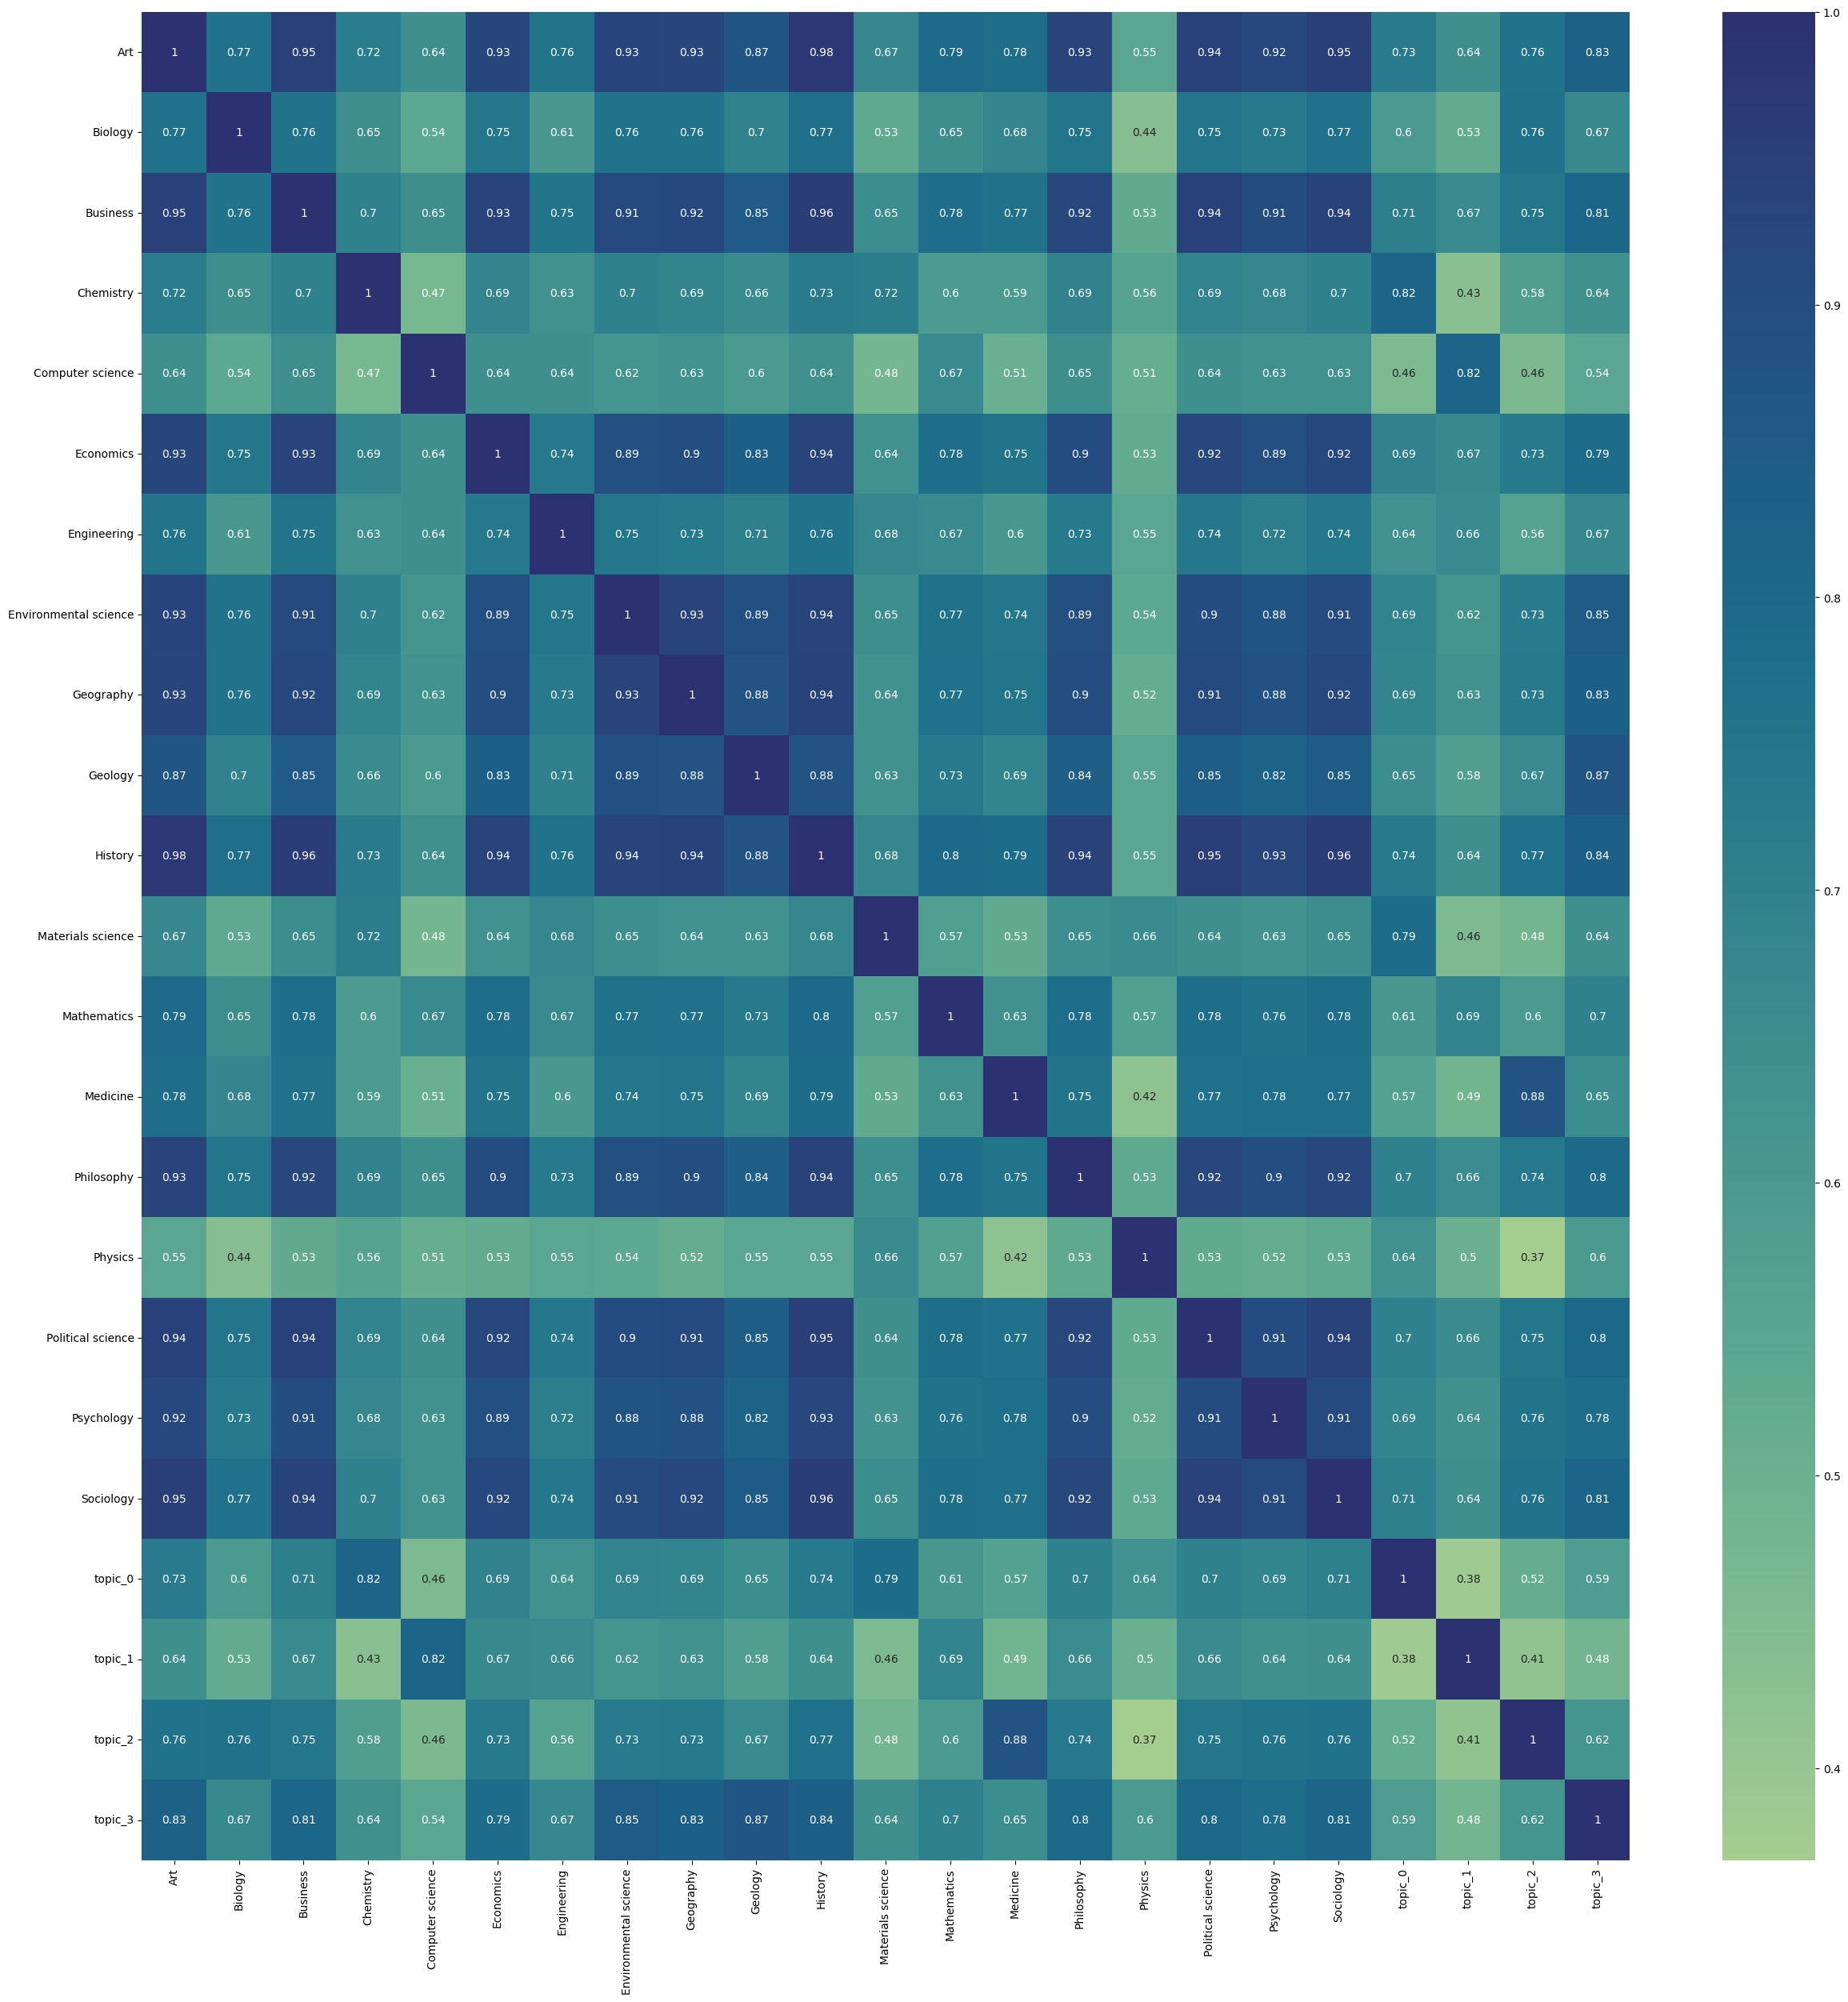

In [449]:
sns.heatmap(jac_sim, cmap="crest", annot=True)
plt.show()
plt.rcParams["figure.figsize"] = (30,30)

In [457]:
for n in range(4):
    topic = 'topic_{}'.format(n)
    top = list(jac_sim.nlargest(6, topic).index)
    print(topic, top)

topic_0 ['topic_0', 'Chemistry', 'Materials science', 'History', 'Art', 'Business']
topic_1 ['topic_1', 'Computer science', 'Mathematics', 'Economics', 'Business', 'Engineering']
topic_2 ['topic_2', 'Medicine', 'History', 'Biology', 'Art', 'Sociology']
topic_3 ['topic_3', 'Geology', 'Environmental science', 'History', 'Geography', 'Art']


In [ ]:
#topic 0: Chemistry-materials
#topic 1: CS-maths
#topic 2: Medicine-biology
#topic 3: Geology-environ-geography

#History and Art. And in general humanities did not get well classified in the model. Probably because there are less entities.

#with 4 topics was not bad. I'm trying with 5 now. to see if I can catch the humanities

#if more time, use other types of vectorization, a proper hyperparameter tuning of LDA

In [454]:
df_docs_topics.value_counts()

topic
1        12492
0         8868
2         7782
3         5424
dtype: int64

# Task 6 (optional)

In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39409 entries, 0 to 39408
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       39409 non-null  object
 1   title                    39409 non-null  object
 2   abstract_inverted_index  39409 non-null  object
 3   abstract                 39407 non-null  object
 4   lang                     39409 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [6]:
from deep_translator import GoogleTranslator

In [7]:
df6 = df3
df6 = df6.dropna().reset_index().drop(columns='index')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39407 entries, 0 to 39406
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       39407 non-null  object
 1   title                    39407 non-null  object
 2   abstract_inverted_index  39407 non-null  object
 3   abstract                 39407 non-null  object
 4   lang                     39407 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [8]:
def slice_text(text):
    fragments = [text[i:i+4000] for i in range(0, len(text), 4000)]
    return fragments

In [9]:
def translate_to_eng(row):
    if row.lang!='en':
        print("processing row {row_name} of abstract with length {abstract_length} ...".format(
            row_name = row.name,
            abstract_length=len(row['abstract'])
        ))
        try:
            if len(row.abstract) < 5000:
                translated = GoogleTranslator(source='auto', target='en').translate(row['abstract'])  # output -> Weiter so, du bist großartig
                return translated
            else:
                full_trans=[]
                chunks = slice_text(row.abstract)
                for chunk in chunks:
                    translated = GoogleTranslator(source='auto', target='en').translate(chunk)
                    full_trans.append(translated)
                return ' '.join(full_trans)
        except Exception as exception:
            print(exception)
            return 'Translation not available'
    else:
        return row['abstract']
    

In [10]:
df6['eng_translation']=df6.apply(translate_to_eng, axis=1)

processing row 1101 of abstract with length 3919 ...
processing row 2084 of abstract with length 3546 ...
processing row 2336 of abstract with length 3528 ...
processing row 2555 of abstract with length 3663 ...
processing row 2948 of abstract with length 3675 ...
processing row 3005 of abstract with length 150 ...
processing row 3643 of abstract with length 861 ...
processing row 4018 of abstract with length 197 ...
processing row 4445 of abstract with length 4076 ...
processing row 5179 of abstract with length 3245 ...
processing row 6252 of abstract with length 677 ...
processing row 6663 of abstract with length 1816 ...
processing row 6909 of abstract with length 2 ...
processing row 7426 of abstract with length 2 ...
processing row 8257 of abstract with length 5144 ...
processing row 8376 of abstract with length 8 ...
processing row 8391 of abstract with length 1620 ...
processing row 8576 of abstract with length 157 ...
processing row 10313 of abstract with length 4438 ...
proces

processing row 23016 of abstract with length 718 ...
processing row 23062 of abstract with length 1369 ...
processing row 23091 of abstract with length 864 ...
processing row 23154 of abstract with length 2970 ...
processing row 23211 of abstract with length 527 ...
processing row 23247 of abstract with length 1109 ...
processing row 23256 of abstract with length 1967 ...
processing row 23262 of abstract with length 200 ...
processing row 23272 of abstract with length 568 ...
processing row 23317 of abstract with length 3186 ...
processing row 23349 of abstract with length 388 ...
processing row 23351 of abstract with length 2667 ...
processing row 23414 of abstract with length 2107 ...
processing row 23421 of abstract with length 783 ...
processing row 23426 of abstract with length 1712 ...
processing row 23434 of abstract with length 1098 ...
processing row 23453 of abstract with length 1518 ...
processing row 23496 of abstract with length 1004 ...
processing row 23511 of abstract wi

processing row 26744 of abstract with length 112 ...
processing row 26746 of abstract with length 1351 ...
processing row 26762 of abstract with length 1134 ...
processing row 26769 of abstract with length 936 ...
processing row 26776 of abstract with length 1132 ...
processing row 26799 of abstract with length 1406 ...
processing row 26811 of abstract with length 1102 ...
processing row 26826 of abstract with length 200 ...
processing row 26838 of abstract with length 2740 ...
processing row 26850 of abstract with length 2617 ...
processing row 26880 of abstract with length 1640 ...
processing row 26888 of abstract with length 2129 ...
processing row 26907 of abstract with length 2391 ...
processing row 26911 of abstract with length 1737 ...
processing row 26926 of abstract with length 490 ...
processing row 26991 of abstract with length 1337 ...
processing row 27056 of abstract with length 328 ...
processing row 27069 of abstract with length 892 ...
processing row 27098 of abstract w

processing row 28519 of abstract with length 2520 ...
processing row 28520 of abstract with length 2408 ...
processing row 28521 of abstract with length 2514 ...
processing row 28522 of abstract with length 1420 ...
processing row 28523 of abstract with length 2301 ...
processing row 28524 of abstract with length 2579 ...
processing row 28525 of abstract with length 1709 ...
processing row 28526 of abstract with length 2250 ...
processing row 28527 of abstract with length 2623 ...
processing row 28528 of abstract with length 2540 ...
processing row 28529 of abstract with length 2518 ...
processing row 28530 of abstract with length 2169 ...
processing row 28531 of abstract with length 2202 ...
processing row 28532 of abstract with length 2523 ...
processing row 28533 of abstract with length 1390 ...
processing row 28534 of abstract with length 2139 ...
processing row 28537 of abstract with length 1122 ...
processing row 28542 of abstract with length 159 ...
processing row 28546 of abstr

processing row 28784 of abstract with length 2067 ...
processing row 28786 of abstract with length 2218 ...
processing row 28791 of abstract with length 2257 ...
processing row 28792 of abstract with length 3914 ...
processing row 28794 of abstract with length 771 ...
processing row 28796 of abstract with length 825 ...
processing row 28799 of abstract with length 3525 ...
processing row 28800 of abstract with length 2299 ...
processing row 28806 of abstract with length 1698 ...
processing row 28808 of abstract with length 748 ...
processing row 28809 of abstract with length 1699 ...
processing row 28810 of abstract with length 1679 ...
processing row 28813 of abstract with length 3955 ...
processing row 28815 of abstract with length 1495 ...
processing row 28816 of abstract with length 2212 ...
processing row 28817 of abstract with length 1687 ...
processing row 28821 of abstract with length 1058 ...
processing row 28824 of abstract with length 1559 ...
processing row 28830 of abstrac

processing row 29168 of abstract with length 559 ...
processing row 29169 of abstract with length 1050 ...
processing row 29170 of abstract with length 730 ...
processing row 29171 of abstract with length 986 ...
processing row 29172 of abstract with length 1298 ...
processing row 29173 of abstract with length 1395 ...
processing row 29175 of abstract with length 1056 ...
processing row 29176 of abstract with length 965 ...
processing row 29177 of abstract with length 2036 ...
processing row 29178 of abstract with length 1244 ...
processing row 29190 of abstract with length 3975 ...
processing row 29191 of abstract with length 1406 ...
processing row 29192 of abstract with length 1096 ...
processing row 29193 of abstract with length 1050 ...
processing row 29194 of abstract with length 1089 ...
processing row 29195 of abstract with length 2446 ...
processing row 29197 of abstract with length 1687 ...
processing row 29198 of abstract with length 1668 ...
processing row 29199 of abstract

processing row 29385 of abstract with length 930 ...
processing row 29386 of abstract with length 1179 ...
processing row 29387 of abstract with length 1262 ...
processing row 29388 of abstract with length 706 ...
processing row 29389 of abstract with length 672 ...
processing row 29390 of abstract with length 1103 ...
processing row 29391 of abstract with length 329 ...
processing row 29392 of abstract with length 791 ...
processing row 29393 of abstract with length 866 ...
processing row 29394 of abstract with length 985 ...
processing row 29395 of abstract with length 889 ...
processing row 29396 of abstract with length 992 ...
processing row 29397 of abstract with length 691 ...
processing row 29398 of abstract with length 719 ...
processing row 29399 of abstract with length 1051 ...
processing row 29400 of abstract with length 951 ...
processing row 29401 of abstract with length 995 ...
processing row 29402 of abstract with length 1092 ...
processing row 29403 of abstract with len

processing row 29601 of abstract with length 904 ...
processing row 29602 of abstract with length 788 ...
processing row 29603 of abstract with length 987 ...
processing row 29605 of abstract with length 1045 ...
processing row 29611 of abstract with length 1970 ...
processing row 29613 of abstract with length 1533 ...
processing row 29614 of abstract with length 180 ...
processing row 29615 of abstract with length 1112 ...
processing row 29616 of abstract with length 1828 ...
processing row 29617 of abstract with length 1834 ...
processing row 29618 of abstract with length 724 ...
processing row 29619 of abstract with length 929 ...
processing row 29620 of abstract with length 2428 ...
processing row 29621 of abstract with length 1045 ...
processing row 29623 of abstract with length 1393 ...
processing row 29631 of abstract with length 878 ...
processing row 29633 of abstract with length 712 ...
processing row 29659 of abstract with length 2319 ...
processing row 29664 of abstract wit

processing row 29971 of abstract with length 314 ...
processing row 29973 of abstract with length 1606 ...
processing row 29974 of abstract with length 311 ...
processing row 29975 of abstract with length 1571 ...
processing row 29976 of abstract with length 414 ...
processing row 29977 of abstract with length 991 ...
processing row 29978 of abstract with length 1933 ...
processing row 29979 of abstract with length 813 ...
processing row 29980 of abstract with length 669 ...
processing row 29981 of abstract with length 995 ...
processing row 29982 of abstract with length 768 ...
processing row 29983 of abstract with length 1075 ...
processing row 29984 of abstract with length 896 ...
processing row 29985 of abstract with length 906 ...
processing row 29986 of abstract with length 954 ...
processing row 29987 of abstract with length 3024 ...
processing row 29988 of abstract with length 808 ...
processing row 29991 of abstract with length 1261 ...
processing row 29992 of abstract with le

processing row 30251 of abstract with length 1604 ...
processing row 30256 of abstract with length 535 ...
processing row 30258 of abstract with length 1968 ...
processing row 30259 of abstract with length 2380 ...
processing row 30260 of abstract with length 1750 ...
processing row 30261 of abstract with length 2637 ...
processing row 30262 of abstract with length 2618 ...
processing row 30263 of abstract with length 2110 ...
processing row 30264 of abstract with length 1412 ...
processing row 30265 of abstract with length 2422 ...
processing row 30266 of abstract with length 3134 ...
processing row 30267 of abstract with length 2221 ...
processing row 30268 of abstract with length 2270 ...
processing row 30270 of abstract with length 1919 ...
processing row 30271 of abstract with length 1156 ...
processing row 30272 of abstract with length 2476 ...
processing row 30273 of abstract with length 422 ...
processing row 30274 of abstract with length 2253 ...
processing row 30275 of abstra

processing row 30535 of abstract with length 1380 ...
processing row 30537 of abstract with length 660 ...
processing row 30538 of abstract with length 194 ...
processing row 30539 of abstract with length 194 ...
processing row 30542 of abstract with length 1701 ...
processing row 30543 of abstract with length 116 ...
processing row 30546 of abstract with length 762 ...
processing row 30550 of abstract with length 1819 ...
processing row 30565 of abstract with length 2425 ...
processing row 30566 of abstract with length 1683 ...
processing row 30578 of abstract with length 986 ...
processing row 30579 of abstract with length 669 ...
processing row 30580 of abstract with length 2207 ...
processing row 30582 of abstract with length 2286 ...
processing row 30583 of abstract with length 2376 ...
processing row 30584 of abstract with length 2487 ...
processing row 30585 of abstract with length 504 ...
processing row 30586 of abstract with length 1783 ...
processing row 30587 of abstract wit

processing row 30854 of abstract with length 1614 ...
processing row 30855 of abstract with length 1699 ...
processing row 30856 of abstract with length 943 ...
processing row 30858 of abstract with length 1797 ...
processing row 30859 of abstract with length 1943 ...
processing row 30861 of abstract with length 2401 ...
processing row 30865 of abstract with length 205 ...
processing row 30867 of abstract with length 205 ...
processing row 30868 of abstract with length 1395 ...
processing row 30871 of abstract with length 439 ...
processing row 30874 of abstract with length 723 ...
processing row 30887 of abstract with length 666 ...
processing row 30900 of abstract with length 3036 ...
processing row 30904 of abstract with length 1688 ...
processing row 30907 of abstract with length 1667 ...
processing row 30908 of abstract with length 1681 ...
processing row 30909 of abstract with length 1391 ...
processing row 30911 of abstract with length 2695 ...
processing row 30912 of abstract w

processing row 31239 of abstract with length 2257 ...
processing row 31240 of abstract with length 1699 ...
processing row 31241 of abstract with length 715 ...
processing row 31243 of abstract with length 542 ...
processing row 31244 of abstract with length 898 ...
processing row 31245 of abstract with length 968 ...
processing row 31252 of abstract with length 1653 ...
processing row 31254 of abstract with length 1537 ...
processing row 31256 of abstract with length 862 ...
processing row 31257 of abstract with length 1107 ...
processing row 31258 of abstract with length 947 ...
processing row 31259 of abstract with length 730 ...
processing row 31260 of abstract with length 690 ...
processing row 31262 of abstract with length 878 ...
processing row 31263 of abstract with length 1320 ...
processing row 31268 of abstract with length 486 ...
processing row 31275 of abstract with length 744 ...
processing row 31276 of abstract with length 1037 ...
processing row 31277 of abstract with l

processing row 31430 of abstract with length 2218 ...
processing row 31431 of abstract with length 2845 ...
processing row 31433 of abstract with length 2911 ...
processing row 31434 of abstract with length 4653 ...
processing row 31435 of abstract with length 2636 ...
processing row 31436 of abstract with length 2465 ...
processing row 31437 of abstract with length 1915 ...
processing row 31438 of abstract with length 2338 ...
processing row 31439 of abstract with length 1857 ...
processing row 31440 of abstract with length 3176 ...
processing row 31441 of abstract with length 2246 ...
processing row 31442 of abstract with length 2117 ...
processing row 31443 of abstract with length 2526 ...
processing row 31449 of abstract with length 974 ...
processing row 31451 of abstract with length 1026 ...
processing row 31472 of abstract with length 3080 ...
processing row 31473 of abstract with length 1439 ...
processing row 31476 of abstract with length 652 ...
processing row 31477 of abstra

processing row 31746 of abstract with length 1423 ...
processing row 31747 of abstract with length 784 ...
processing row 31748 of abstract with length 1203 ...
processing row 31749 of abstract with length 656 ...
processing row 31752 of abstract with length 2434 ...
processing row 31754 of abstract with length 1103 ...
processing row 31755 of abstract with length 1020 ...
processing row 31757 of abstract with length 1183 ...
processing row 31758 of abstract with length 1749 ...
processing row 31759 of abstract with length 1684 ...
processing row 31760 of abstract with length 1965 ...
processing row 31761 of abstract with length 528 ...
processing row 31762 of abstract with length 1109 ...
processing row 31763 of abstract with length 1084 ...
processing row 31764 of abstract with length 1741 ...
processing row 31765 of abstract with length 1697 ...
processing row 31770 of abstract with length 1693 ...
processing row 31771 of abstract with length 2465 ...
processing row 31772 of abstrac

processing row 32090 of abstract with length 1290 ...
processing row 32091 of abstract with length 1670 ...
processing row 32092 of abstract with length 1345 ...
processing row 32093 of abstract with length 596 ...
processing row 32095 of abstract with length 1312 ...
processing row 32096 of abstract with length 1651 ...
processing row 32099 of abstract with length 3559 ...
processing row 32114 of abstract with length 3651 ...
processing row 32115 of abstract with length 687 ...
processing row 32116 of abstract with length 3150 ...
processing row 32117 of abstract with length 1693 ...
processing row 32118 of abstract with length 986 ...
processing row 32123 of abstract with length 1700 ...
processing row 32124 of abstract with length 1624 ...
processing row 32125 of abstract with length 1180 ...
processing row 32130 of abstract with length 209 ...
processing row 32131 of abstract with length 1673 ...
processing row 32135 of abstract with length 1511 ...
processing row 32138 of abstract

processing row 32452 of abstract with length 1377 ...
processing row 32457 of abstract with length 1686 ...
processing row 32458 of abstract with length 2060 ...
processing row 32459 of abstract with length 3548 ...
processing row 32461 of abstract with length 2366 ...
processing row 32462 of abstract with length 1226 ...
processing row 32471 of abstract with length 1980 ...
processing row 32472 of abstract with length 1847 ...
processing row 32473 of abstract with length 1627 ...
processing row 32478 of abstract with length 106 ...
processing row 32488 of abstract with length 640 ...
processing row 32490 of abstract with length 2203 ...
processing row 32492 of abstract with length 2041 ...
processing row 32493 of abstract with length 1944 ...
processing row 32494 of abstract with length 624 ...
processing row 32496 of abstract with length 1603 ...
processing row 32497 of abstract with length 2516 ...
processing row 32498 of abstract with length 1039 ...
processing row 32499 of abstrac

processing row 32760 of abstract with length 921 ...
processing row 32761 of abstract with length 734 ...
processing row 32762 of abstract with length 539 ...
processing row 32763 of abstract with length 1416 ...
processing row 32764 of abstract with length 765 ...
processing row 32765 of abstract with length 547 ...
processing row 32766 of abstract with length 791 ...
processing row 32768 of abstract with length 3759 ...
processing row 32770 of abstract with length 939 ...
processing row 32771 of abstract with length 969 ...
processing row 32772 of abstract with length 807 ...
processing row 32773 of abstract with length 881 ...
processing row 32775 of abstract with length 1009 ...
processing row 32776 of abstract with length 449 ...
processing row 32777 of abstract with length 1820 ...
processing row 32779 of abstract with length 2203 ...
processing row 32780 of abstract with length 956 ...
processing row 32781 of abstract with length 888 ...
processing row 32782 of abstract with len

processing row 33098 of abstract with length 1119 ...
processing row 33101 of abstract with length 2422 ...
processing row 33103 of abstract with length 204 ...
processing row 33104 of abstract with length 1920 ...
processing row 33106 of abstract with length 2686 ...
processing row 33108 of abstract with length 1356 ...
processing row 33110 of abstract with length 831 ...
processing row 33111 of abstract with length 847 ...
processing row 33112 of abstract with length 872 ...
processing row 33113 of abstract with length 530 ...
processing row 33114 of abstract with length 1714 ...
processing row 33115 of abstract with length 1948 ...
processing row 33124 of abstract with length 1277 ...
processing row 33125 of abstract with length 2038 ...
processing row 33127 of abstract with length 2001 ...
processing row 33131 of abstract with length 1886 ...
processing row 33135 of abstract with length 1807 ...
processing row 33136 of abstract with length 2235 ...
processing row 33137 of abstract 

processing row 33509 of abstract with length 1078 ...
processing row 33513 of abstract with length 2217 ...
processing row 33514 of abstract with length 1689 ...
processing row 33515 of abstract with length 1700 ...
processing row 33516 of abstract with length 2551 ...
processing row 33517 of abstract with length 647 ...
processing row 33521 of abstract with length 1684 ...
processing row 33524 of abstract with length 1082 ...
processing row 33525 of abstract with length 1083 ...
processing row 33526 of abstract with length 1582 ...
processing row 33527 of abstract with length 1465 ...
processing row 33531 of abstract with length 1432 ...
processing row 33532 of abstract with length 1961 ...
processing row 33536 of abstract with length 1662 ...
processing row 33537 of abstract with length 1700 ...
processing row 33539 of abstract with length 1240 ...
processing row 33540 of abstract with length 1820 ...
processing row 33541 of abstract with length 1106 ...
processing row 33542 of abstr

processing row 33925 of abstract with length 1312 ...
processing row 33926 of abstract with length 957 ...
processing row 33931 of abstract with length 1917 ...
processing row 33932 of abstract with length 2095 ...
processing row 33933 of abstract with length 1711 ...
processing row 33935 of abstract with length 2227 ...
processing row 33936 of abstract with length 2157 ...
processing row 33939 of abstract with length 1608 ...
processing row 33941 of abstract with length 2040 ...
processing row 33947 of abstract with length 498 ...
processing row 33956 of abstract with length 1534 ...
processing row 33978 of abstract with length 1189 ...
processing row 33981 of abstract with length 1321 ...
processing row 33982 of abstract with length 1707 ...
processing row 33983 of abstract with length 1100 ...
processing row 33984 of abstract with length 1492 ...
processing row 33988 of abstract with length 538 ...
processing row 33990 of abstract with length 989 ...
processing row 33992 of abstract

processing row 34265 of abstract with length 1699 ...
processing row 34266 of abstract with length 1964 ...
processing row 34267 of abstract with length 1671 ...
processing row 34268 of abstract with length 1692 ...
processing row 34270 of abstract with length 1673 ...
processing row 34271 of abstract with length 1682 ...
processing row 34272 of abstract with length 1689 ...
processing row 34275 of abstract with length 1693 ...
processing row 34276 of abstract with length 560 ...
processing row 34279 of abstract with length 1694 ...
processing row 34280 of abstract with length 1700 ...
processing row 34281 of abstract with length 1673 ...
processing row 34282 of abstract with length 838 ...
processing row 34285 of abstract with length 1692 ...
processing row 34286 of abstract with length 1595 ...
processing row 34287 of abstract with length 1702 ...
processing row 34289 of abstract with length 1599 ...
processing row 34290 of abstract with length 1696 ...
processing row 34291 of abstra

processing row 34586 of abstract with length 2340 ...
processing row 34587 of abstract with length 2919 ...
processing row 34588 of abstract with length 2976 ...
processing row 34590 of abstract with length 2318 ...
processing row 34591 of abstract with length 2710 ...
processing row 34593 of abstract with length 4267 ...
processing row 34594 of abstract with length 3946 ...
processing row 34595 of abstract with length 3496 ...
processing row 34596 of abstract with length 1721 ...
processing row 34597 of abstract with length 3495 ...
processing row 34598 of abstract with length 3009 ...
processing row 34599 of abstract with length 2770 ...
processing row 34600 of abstract with length 2039 ...
processing row 34601 of abstract with length 2046 ...
processing row 34603 of abstract with length 1542 ...
processing row 34604 of abstract with length 1683 ...
processing row 34606 of abstract with length 1625 ...
processing row 34607 of abstract with length 2939 ...
processing row 34608 of abst

processing row 34903 of abstract with length 190 ...
processing row 34906 of abstract with length 725 ...
processing row 34908 of abstract with length 1212 ...
processing row 34912 of abstract with length 591 ...
processing row 34917 of abstract with length 2090 ...
processing row 34920 of abstract with length 619 ...
processing row 34928 of abstract with length 729 ...
processing row 34929 of abstract with length 1089 ...
processing row 34930 of abstract with length 880 ...
processing row 34931 of abstract with length 580 ...
processing row 34932 of abstract with length 1076 ...
processing row 34933 of abstract with length 1696 ...
processing row 34934 of abstract with length 1274 ...
processing row 34937 of abstract with length 849 ...
processing row 34940 of abstract with length 724 ...
processing row 34941 of abstract with length 906 ...
processing row 34943 of abstract with length 720 ...
processing row 34945 of abstract with length 997 ...
processing row 34946 of abstract with le

processing row 35420 of abstract with length 3622 ...
processing row 35421 of abstract with length 1108 ...
processing row 35422 of abstract with length 996 ...
processing row 35423 of abstract with length 1225 ...
processing row 35424 of abstract with length 1351 ...
processing row 35425 of abstract with length 512 ...
processing row 35426 of abstract with length 906 ...
processing row 35427 of abstract with length 1294 ...
processing row 35428 of abstract with length 884 ...
processing row 35429 of abstract with length 1212 ...
processing row 35430 of abstract with length 893 ...
processing row 35433 of abstract with length 1282 ...
processing row 35434 of abstract with length 1277 ...
processing row 35435 of abstract with length 920 ...
processing row 35436 of abstract with length 1268 ...
processing row 35437 of abstract with length 1024 ...
processing row 35438 of abstract with length 1334 ...
processing row 35439 of abstract with length 1260 ...
processing row 35440 of abstract w

processing row 35695 of abstract with length 1571 ...
processing row 35697 of abstract with length 201 ...
processing row 35698 of abstract with length 201 ...
processing row 35699 of abstract with length 1415 ...
processing row 35700 of abstract with length 2577 ...
processing row 35701 of abstract with length 1104 ...
processing row 35702 of abstract with length 1482 ...
processing row 35703 of abstract with length 1526 ...
processing row 35705 of abstract with length 1066 ...
processing row 35707 of abstract with length 1600 ...
processing row 35712 of abstract with length 1131 ...
processing row 35713 of abstract with length 1655 ...
processing row 35717 of abstract with length 655 ...
processing row 35718 of abstract with length 269 ...
processing row 35721 of abstract with length 1634 ...
processing row 35722 of abstract with length 1610 ...
processing row 35723 of abstract with length 565 ...
processing row 35725 of abstract with length 2130 ...
processing row 35728 of abstract 

processing row 36107 of abstract with length 988 ...
processing row 36108 of abstract with length 917 ...
processing row 36109 of abstract with length 1078 ...
processing row 36110 of abstract with length 1755 ...
processing row 36116 of abstract with length 1096 ...
processing row 36120 of abstract with length 1792 ...
processing row 36121 of abstract with length 1441 ...
processing row 36122 of abstract with length 1844 ...
processing row 36124 of abstract with length 1032 ...
processing row 36125 of abstract with length 967 ...
processing row 36126 of abstract with length 1702 ...
processing row 36128 of abstract with length 908 ...
processing row 36130 of abstract with length 409 ...
processing row 36131 of abstract with length 1516 ...
processing row 36134 of abstract with length 3352 ...
processing row 36135 of abstract with length 831 ...
processing row 36136 of abstract with length 837 ...
processing row 36137 of abstract with length 1011 ...
processing row 36138 of abstract wi

processing row 36448 of abstract with length 1689 ...
processing row 36449 of abstract with length 1685 ...
processing row 36450 of abstract with length 3163 ...
processing row 36451 of abstract with length 3620 ...
processing row 36452 of abstract with length 1857 ...
processing row 36461 of abstract with length 1840 ...
processing row 36471 of abstract with length 1702 ...
processing row 36481 of abstract with length 1734 ...
processing row 36482 of abstract with length 1283 ...
processing row 36485 of abstract with length 1695 ...
processing row 36487 of abstract with length 1608 ...
processing row 36490 of abstract with length 2033 ...
processing row 36491 of abstract with length 2598 ...
processing row 36492 of abstract with length 1330 ...
processing row 36500 of abstract with length 2323 ...
processing row 36501 of abstract with length 1713 ...
processing row 36503 of abstract with length 1684 ...
processing row 36508 of abstract with length 1271 ...
processing row 36509 of abst

processing row 36816 of abstract with length 2421 ...
processing row 36817 of abstract with length 3181 ...
processing row 36818 of abstract with length 1068 ...
processing row 36820 of abstract with length 660 ...
processing row 36821 of abstract with length 2015 ...
processing row 36823 of abstract with length 2822 ...
processing row 36824 of abstract with length 2379 ...
processing row 36827 of abstract with length 1110 ...
processing row 36828 of abstract with length 690 ...
processing row 36830 of abstract with length 1087 ...
processing row 36837 of abstract with length 1680 ...
processing row 36840 of abstract with length 1656 ...
processing row 36850 of abstract with length 161 ...
processing row 36851 of abstract with length 679 ...
processing row 36852 of abstract with length 131 ...
processing row 36853 of abstract with length 1981 ...
processing row 36854 of abstract with length 2551 ...
processing row 36855 of abstract with length 1720 ...
processing row 36867 of abstract 

processing row 37460 of abstract with length 2269 ...
processing row 37461 of abstract with length 2383 ...
processing row 37462 of abstract with length 2024 ...
processing row 37463 of abstract with length 2180 ...
processing row 37465 of abstract with length 506 ...
processing row 37501 of abstract with length 1487 ...
processing row 37502 of abstract with length 585 ...
processing row 37513 of abstract with length 2675 ...
processing row 37515 of abstract with length 2213 ...
processing row 37528 of abstract with length 879 ...
processing row 37530 of abstract with length 2134 ...
processing row 37534 of abstract with length 1914 ...
processing row 37557 of abstract with length 1693 ...
processing row 37567 of abstract with length 1277 ...
processing row 37573 of abstract with length 1642 ...
processing row 37584 of abstract with length 1618 ...
processing row 37587 of abstract with length 1096 ...
processing row 37589 of abstract with length 1999 ...
processing row 37590 of abstrac

processing row 38223 of abstract with length 2898 ...
processing row 38246 of abstract with length 1476 ...
processing row 38248 of abstract with length 1092 ...
processing row 38253 of abstract with length 3271 ...
processing row 38257 of abstract with length 1653 ...
processing row 38269 of abstract with length 3049 ...
processing row 38279 of abstract with length 1197 ...
processing row 38286 of abstract with length 2625 ...
processing row 38287 of abstract with length 3071 ...
processing row 38293 of abstract with length 1919 ...
processing row 38360 of abstract with length 2478 ...
processing row 38362 of abstract with length 2688 ...
processing row 38365 of abstract with length 2544 ...
processing row 38366 of abstract with length 873 ...
processing row 38370 of abstract with length 1339 ...
processing row 38381 of abstract with length 277 ...
processing row 38397 of abstract with length 2630 ...
processing row 38399 of abstract with length 1371 ...
processing row 38441 of abstra

processing row 39027 of abstract with length 2406 ...
processing row 39028 of abstract with length 2336 ...
processing row 39031 of abstract with length 3030 ...
processing row 39032 of abstract with length 2360 ...
processing row 39078 of abstract with length 1903 ...
processing row 39080 of abstract with length 2615 ...
processing row 39082 of abstract with length 1533 ...
processing row 39093 of abstract with length 1784 ...
processing row 39105 of abstract with length 1908 ...
processing row 39106 of abstract with length 118 ...
processing row 39113 of abstract with length 852 ...
processing row 39119 of abstract with length 1460 ...
processing row 39124 of abstract with length 1007 ...
processing row 39131 of abstract with length 1975 ...
processing row 39145 of abstract with length 1125 ...
processing row 39152 of abstract with length 457 ...
processing row 39154 of abstract with length 1157 ...
processing row 39157 of abstract with length 1592 ...
processing row 39176 of abstrac

In [ ]:
df6['eng_translation']=df6.apply(translate_to_eng, axis=1)

In [ ]:
#mixed abstrcts (with translations!)

In [4]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39407 entries, 0 to 39406
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       39407 non-null  object
 1   title                    39407 non-null  object
 2   abstract_inverted_index  39407 non-null  object
 3   abstract                 39407 non-null  object
 4   lang                     39407 non-null  object
 5   eng_translation          39406 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [19]:
df6[df6.lang!='en'].head(100)

,id,title,abstract_inverted_index,abstract,lang,eng_translation
1101,https://openalex.org/W3013959015,Obstructive sleep apnoea and cardiovascular co...,"{'Central': [0], 'illustration:': [1], 'Mechan...",Central illustration: Mechanisms involved in d...,fr,Central illustration: Mechanisms involved in d...
2084,https://openalex.org/W3020652000,Renin-angiotensin-aldosterone system and COVID...,"{'With': [0], 'the': [1, 33, 40, 49, 61, 92, 1...",With the multiplication of COVID-19 severe acu...,fr,With the multiplication of COVID-19 severe acu...
2336,https://openalex.org/W3020067557,One train may hide another: Acute cardiovascul...,"{'Coronavirus': [0], 'disease': [1, 254], '201...",Coronavirus disease 2019 (COVID-19) is likely ...,fr,Coronavirus disease 2019 (COVID-19) is likely ...
2555,https://openalex.org/W2808766225,Multimodality imaging guidance for percutaneou...,"{'Percutaneous': [0, 18], 'paravalvular': [1],...",Percutaneous paravalvular leak (PVL) closure h...,fr,Percutaneous paravalvular leak (PVL) closure h...
2948,https://openalex.org/W2592600102,Outcome of adults with Eisenmenger syndrome tr...,"{'The': [0, 113], 'relationship': [1, 26], 'be...",The relationship between pulmonary arterial hy...,fr,The relationship between pulmonary arterial hy...
...,...,...,...,...,...,...
20758,https://openalex.org/W2899466703,Décès en relation avec l’abus de médicaments e...,"{'Introduction': [0], 'DRAMES': [2], 'est': [3...",Introduction DRAMES est une etude annuelle pro...,fr,Introduction DRAMES is an annual prospective s...
20776,https://openalex.org/W2901551576,Du riverain au résident : évolutions des liens...,"{'Au': [0], 'regard': [1], 'de': [2, 7, 11, 16...",Au regard de l’histoire longue d’un milieu de ...,fr,With regard to the long history of a marsh env...
20784,https://openalex.org/W2892638589,kNN local linear estimation of the conditional...,"{'Let': [0], '(': [1, 97], 'X': [2, 56, 98, 15...","Let ( X i , Y i ) i = 1 , … , n be a sequence ...",fr,"Let ( X i , Y i ) i = 1 , … , n be a sequence ..."
20795,https://openalex.org/W2843198117,Motifs textuels spécifiques au genre policier ...,"{'L’étude': [0], 'propose': [1], 'd’analyser':...",L’étude propose d’analyser des motifs textuels...,fr,The study proposes to analyze specific textual...


In [25]:
df6[df6.eng_translation.isna()]

,id,title,abstract_inverted_index,abstract,lang,eng_translation
30822,https://openalex.org/W2890805169,François Robinet – Silences et récits. Les méd...,{'.': [0]},.,No language detected.,NaN


In [5]:
df6=df6[~df6.eng_translation.isna()].reset_index().drop(columns=['id'])

In [6]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39406 entries, 0 to 39405
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    39406 non-null  int64 
 1   title                    39406 non-null  object
 2   abstract_inverted_index  39406 non-null  object
 3   abstract                 39406 non-null  object
 4   lang                     39406 non-null  object
 5   eng_translation          39406 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.8+ MB


In [9]:
df6['clean_eng_text']=df6.eng_translation.apply(clean_text)

In [10]:
df6.to_csv('data/translated.csv', index=False)

In [2]:
df6 = pd.read_csv('data/translated.csv')

In [3]:
df6=df6.dropna().reset_index().drop(columns='index')

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
import multiprocessing
from time import time  # To time our operations

In [36]:
#Phrases() espera una lista de listas de palabras como input.
sent = [row.split() for row in df6['clean_eng_text']]


In [40]:
phrases = Phrases(sent, min_count=30, progress_per=10000)


In [41]:
bigram = Phraser(phrases)
#transformamos el corpus con los bigrams detectados.
sentences = bigram[sent]

In [45]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

4

In [47]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [50]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.09 mins


In [51]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 5.74 mins


In [55]:
for w in w2v_model.wv.key_to_index:
    print(w)

study
patient
model
using
result
data
two
method
system
also
different
based
used
show
analysis
high
approach
new
effect
one
structure
present
use
first
process
time
case
however
work
well
level
observed
compared
associated
treatment
measurement
group
surface
performance
order
change
phase
material
cell
control
found
complex
abstract
energy
increase
may
sample
technique
field
impact
due
large
parameter
within
design
dynamic
low
rate
several
property
temperature
condition
function
application
interaction
including
potential
year
could
state
three
proposed
value
development
activity
information
network
number
current
obtained
simulation
device
mean
thus
response
performed
research
mechanism
paper
provide
type
test
specific
protein
higher
without
role
source
experiment
risk
among
problem
developed
region
magnetic
solution
tool
range
observation
algorithm
factor
clinical
presence
distribution
form
behavior
local
many
main
set
related
particular
human
conclusion
power
finally
layer
term
aim

In [58]:
# esta función nos da la media de los vectores de cada palabra de una frase
def sentence_embedding(sentence, model):
    tokens = sentence.split(' ')
    vectors = np.array([model.wv[x] for x in tokens if x in w2v_model.wv.key_to_index])
    
    if len(vectors) == 0:
        # Caso en que ninguna de las palabras de la frase está en el diccionario
        avg_vector = np.random.rand(300)
    else:
        avg_vector = vectors.mean(axis=0)
    return avg_vector

In [59]:
# en este loop creamos vectores para cada frase del corpus. Estos vectores pueden ser usados para cualquier tarea de NLP.
dict_vecs={}
for text in df6["clean_eng_text"].tolist():
    vec_text = sentence_embedding(text, w2v_model)
    dict_vecs[text] = vec_text

In [ ]:
reference_review_matrix = np.expand_dims(np.array(df_tfidf.iloc[2].values), axis=0)
distances_to_reference_review = cosine_similarity(reference_review_matrix, X_tfidf)

In [6]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df6.clean_eng_text)]

In [65]:
t = time()

model = Doc2Vec(documents, vector_size=150, window=2, min_count=1, workers=4)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 2.92 mins


In [66]:
model.save("data/d2v.model")

In [7]:
model = Doc2Vec.load("data/d2v.model")

In [9]:
for abstract in df6.clean_eng_text:
    tokens = abstract.split()
    new_vector = model.infer_vector(tokens)
    sims = model.docvecs.most_similar([new_vector])
    for item in sims:
        if item[1]>0.50:
            print(abstract)
            print([text for text in documents if text[2]==item[0]])

/var/folders/8t/pdc266556nvbq2phrrf21cd00000gn/T/ipykernel_72814/2930269201.py:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  sims = model.docvecs.most_similar([new_vector])


KeyboardInterrupt: 

In [72]:
sims

[(17039, 0.8638123869895935),
 (8671, 0.8497551083564758),
 (23990, 0.8471620082855225),
 (14658, 0.8429966568946838),
 (11860, 0.837904691696167),
 (34968, 0.8322238922119141),
 (11312, 0.8318806290626526),
 (14681, 0.8288765549659729),
 (20668, 0.8287479281425476),
 (13877, 0.8282609581947327)]

In [10]:
start = time()#calculamos cuánto se tarda en crear los vectores

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df6.clean_eng_text)

end = time()
print("It took {} sec to fit and transform all documents.".format(end - start))

It took 3.3803598880767822 sec to fit and transform all documents.


In [11]:
tfidf_dict = vectorizer.vocabulary_
df_tf_idf_voc = pd.DataFrame({'column_name': list(tfidf_dict.keys()), 'column_index': list(tfidf_dict.values())})
df_tf_idf_voc = df_tf_idf_voc.sort_values(by='column_index')

In [12]:
df_tfidf = pd.DataFrame(tfidf.toarray())
df_tfidf.columns = df_tf_idf_voc['column_name'].tolist()

In [13]:
df_tfidf.head()
#if more time, I would have done a more careful cleaning, including deleting words with 3 letter repetitions

,aaa,aaaa,aaab,aaad,aab,aabc,aabp,aabw,aac,aachen,...,ﬁnd,ﬁndings,ﬁrst,ﬁtted,ﬁxation,ﬂat,ﬂood,ﬂows,ﬂuctuations,ﬂux
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_sim.sort_values(by="Distance", ascending=False).head(3)

,clean_eng_text,Distance
2,nanomaterials gained prominence technological ...,1.000000
1404,review give overview synthesis photophysical p...,0.160138
19690,abstract study interfacing effect arising diff...,0.140009


In [143]:
def get_highest_sims(k, sim_thresh):
    df_tfidf.iloc[k].values
    reference_review_matrix = np.expand_dims(np.array(df_tfidf.iloc[k].values), axis=0)
    distances_to_reference_review = cosine_similarity(reference_review_matrix, tfidf)
    df_sim=pd.DataFrame(df6['clean_eng_text'])
    df_sim["Distance"]=distances_to_reference_review.transpose()
    if not df_sim[(df_sim['Distance']>sim_thresh) & (df_sim.index!=k)].empty:
        print("INDEX:"+str(k))
        print("ORIGINAL ABSTRACT:")
        print(df6['clean_eng_text'].iloc[k])
        print()
        print("SIMILAR ABSTRACTS:")
        print(df_sim[(df_sim['Distance']>sim_thresh) & (df_sim.index!=k)].values)
        print()

In [144]:
k=0
while k in range(tfidf.shape[0]):
    get_highest_sims(k, 0.8)
    k=k+1

INDEX:5
ORIGINAL ABSTRACT:
current manuscript second update original practical guide published heidbuchel european heart rhythm association practical guide use new oral anticoagulant patient atrial europace heidbuchel updated european heart rhythm association practical guide use antagonist anticoagulant patient atrial europace antagonist oral anticoagulant noacs alternative vitamin antagonist vkas prevent stroke patient atrial fibrillation emerged preferred choice particularly patient newly started physician patient becoming accustomed use drug clinical however many unresolved question optimally use agent specific clinical situation european heart rhythm association ehra set coordinate unified way informing physician use different writing group identified topic concrete clinical scenario practical answer formulated based available topic follows eligibility noacs practical scheme patient noacs ensuring adherence prescribed oral anticoagulant intake switching anticoagulant regimen pharma

INDEX:103
ORIGINAL ABSTRACT:
several form cellulose nanomaterials notably cellulose nanocrystals cellulose nanofibrils exhibit attractive property potentially useful large number industrial include paper cardboard industry use reinforcing filler polymer nanocomposites basis foam additive adhesive paint well wide variety filtration electronic food hygiene cosmetic medical entry focus cellulose material filler polymer ensuing mechanical property obviously depend type nanomaterial used crucial point processing emphasis melt processing nanocomposite material yet properly resolved remains challenge

SIMILAR ABSTRACTS:
[['unexpected attractive property observed decreasing size material cellulose exception addition highly reactive surface cellulose resulting high density hydroxyl group exacerbated different form cellulose nanomaterials resulting deconstruction strategy cellulose nanocrystals cellulose nanofibrils strategy bacterial cellulose potentially useful large number industrial include 

INDEX:202
ORIGINAL ABSTRACT:
datasets produced association study dramatically increased size past year modern datasets commonly including million variant measured dozen thousand increase data size major challenge severely slowing genomic analysis leading software becoming obsolete researcher limited access diverse analysis present two package bigstatsr bigsnpr allowing analysis large scale genomic data performed within address large data size package use accessing data matrix stored disk instead perform data data analysis package integrate tool commonly used either transparent system call existing software updated improved implementation existing particular package implement fast accurate computation principal component analysis association study function remove single nucleotide polymorphism linkage disequilibrium algorithm learn polygenic risk score million single nucleotide illustrate application two package analyzing genomic dataset celiac disease performing association study compu

INDEX:249
ORIGINAL ABSTRACT:
importance nasal oxygen may prevent postextubation respiratory failure intensive care unit icu combination nasal oxygen noninvasive ventilation niv may optimal strategy ventilation avoid objective determine whether nasal oxygen prophylactic niv applied immediately extubation could reduce rate reintubation compared nasal oxygen alone patient high risk extubation failure design setting participant multicenter randomized clinical trial conducted april january among patient high risk extubation failure older year underlying cardiac respiratory disease icu france april intervention patient randomly assigned nasal oxygen alone nasal oxygen niv immediately main outcome measure primary outcome proportion patient reintubated day secondary outcome included postextubation respiratory failure day reintubation rate icu discharge icu result among patient randomized mean age year woman patient completed reintubation rate day nasal oxygen niv nasal oxygen alone difference 

INDEX:335
ORIGINAL ABSTRACT:
performing data augmentation learning deep neural network well known important training visual recognition artificially increasing number training example help reducing overfitting improves object detection classical approach data augmentation consist generating image obtained basic geometrical transformation color change original training work one step leverage segmentation annotation increase number object instance present training approach successful show modeling appropriately visual context surrounding object crucial place right otherwise show previous strategy actually context model achieve significant mean average precision improvement labeled example available benchmark

SIMILAR ABSTRACTS:
[['performing data augmentation learning deep neural network well known important training visual recognition artificially increasing number training example help reducing overfitting improves object detection classical approach data augmentation consist generatin

INDEX:495
ORIGINAL ABSTRACT:
process molecular innovation require tinkering shifting function existing occurs term molecular evolution long evolutionary scale remains poorly analyse natural history vast group molecular system bacteria type filament tff diversified system involved flagellar twitching motility adhesion protein secretion dna phylogeny thousand detected system suggests may present last universal common two bacterial multiple gene duplication gene fission deletion accretion novel surprisingly find adherence tad system originated interkingdom transfer archaea bacteria system resembling epd pilus associated acquisition phylogeny content ancestral system suggest initial bacterial pili engaged cell motility dna contrast specialised protein secretion system arose several time independently much later natural functional diversification tff superfamily accompanied genetic rearrangement implication genetic regulation horizontal gene transfer system encoded fewer locus frequently ex

INDEX:634
ORIGINAL ABSTRACT:
despite importance rise seasonal water availability source geohazards mountain glacier one remaining subsystem global climate system globally applicable open source model present open global glacier model oggm developed provide modular numerical model framework simulating past future change glacier modeling chain comprises data downloading tool glacier outline topography climate validation data preprocessing module model distributed ice thickness estimation model monthly mass balance obtained gridded climate data temperature index melt knowledge oggm first global model explicitly simulate glacier dynamic model relies approximation compute flux ice along multiple connected flow paper describe illustrate processing step applying model selection glacier running global simulation idealized climate even without calibration model show realistic able reproduce earlier estimate global glacier volume varying ice dynamical parameter within range plausible time increa

INDEX:703
ORIGINAL ABSTRACT:
abstract study paper problem jointly clustering learning several previous study shown learning representation faithful data clustered adapted clustering algorithm lead better clustering performance two task performed propose approach clustering based continuous reparametrization objective function lead truly joint behavior approach illustrated various datasets showing efficacy learning representation object clustering

SIMILAR ABSTRACTS:
[['study paper problem jointly clustering learning several previous study shown learning representation faithful data clustered adapted clustering algorithm lead better clustering performance two task performed propose approach clustering based continuous reparametrization objective function lead truly joint behavior approach illustrated various datasets showing efficacy learning representation object clustering'
  0.9978428211582132]]

INDEX:728
ORIGINAL ABSTRACT:
abstract liver injury represent one frequent injury trauma 

KeyboardInterrupt: 

In [ ]:
#what I would do is extract further similarity measures from other features. For instance, form the title, DOI, authors, etc. And either train a ML model to predict duplicity or simply, aggregate all the measures and set a threshold from which we consider that there is duplicity.


# Task 7

Observations:
- The connectivity is not well distributed.
-

- Why should we worry about connectivity?
    - Is it good to be conected?
        - Check impact of work of connected actors
    - Does connectivity have a relationship with impact outside of academia? I would expect so, since often this kind of impact happens on a local level.


- I would try to analyse other forms of connectivity:
    - Can we detect publications arising from specific conferences/events? We should then promote events of a similar type.
    - Can we detect specific journals-publishers giving rise to more connected publications? We should see what these journals-publishers are doing to promote connectivity.
    - Which topics foster more connectivity? Which topics are the more connected actors working on? We should probably promote other topics so the same occurs on those other areas.
    
- What makes the more connected actors be more connected?
    - I would do an exhaustive analysis of which factors are correlated with connectedness. Preliminary ideas:
        - Impact of their work: authors that are more cited attract more collaboration (or is the collaboration the cause of the former?)
        - Location: is it actually their institutions which drive connection?
      
    
2 types of actions:

1) Award connectedness: PEOPLE: award connectedness -- in applications, assign a connectedness degree to each applicant and take into account in awarding funding as one more factor in the final punctuation. But be careful to not overfund people who are very connected. Give less weight to outliers.

    Depending on what is driving connectivity, give more emphasis to one or other:
    EVENTS: award connectedness (with at least 2 Grenoble speakers)
    BOOKS: award connectedness (with at least 2 Grenoble authors)
    PROJECTS: award connectedness (with at least 2 Grenoble institutions)
    
2) Other actions to promote connectedness: avoid concentration of resources to achieve a more distributed network. Special funding programmes for under connected areas of research and for isolated institutions to carry out collaboration projects.